## This notebook scrapes data tables from a PDF file.
## It specifically scrapes multiple tables from a publicly available 2018 DOD report on Per- and polyfluoroalkyl substances (PFAS) concentrations in drinking water on military bases. 

In [1]:
import requests
import urllib3
import os
import pandas as pd
import numpy as np
import pdfplumber 
import io
import matplotlib.pyplot as plt 


os.chdir(r'C:\Users\OITNYNWilsoS\OneDrive - Department of Veterans Affairs\python\PACT Act - MET\final version January 2024')
cwd = os.getcwd()
print("Current working directory is:", cwd)

Current working directory is: C:\Users\OITNYNWilsoS\OneDrive - Department of Veterans Affairs\python\PACT Act - MET\final version January 2024


In [2]:
#function to see the names of the tables

def read_pdf(url: str) -> str:
    http = urllib3.PoolManager()
    temp = io.BytesIO()
    temp.write(http.request("GET", url).data)
    with pdfplumber.open(temp) as pdf:
        page = pdf.pages[20]
        tables = page.extract_tables()
    return tables


In [3]:
#read in pdf from DOD's PFAS website that contains PFAS concentration data
url = 'https://www.acq.osd.mil/eie/eer/ecc/pfas/docs/reports/FY18-HASC-Brief-on-PFOS-PFOA_Mar2018.pdf'

tables = read_pdf(url)

In [4]:
print(tables)

[[['Summary of Testing for DoD Drinking Water Systems and Actions Taken where Results were Above the EPA LHAs1', None, None, None, None, None, None, None, None, None, None, None, None], ['DoD\nComponent', 'Installation', 'State/\nTerritory/\nOverseas\nLocation', 'DoD Purveyor Drinking Water Systems', None, None, None, None, 'Non-DoD Purveyor Drinking Water Systems', None, None, None, None], [None, None, None, 'Total\nNumber\nTested', 'Number\nthat\nTested\nabove the\nEPA\nLHAs1', 'Results (PFOS/ PFOA) or Range\nabove EPA LHAs (ppt)', 'Actions Taken as of August 31, 20172', 'Actions Planned after August 31,\n2017, and Timeline to Implement the\nActions to Reduce PFOS/PFOA\nBelow LHA', 'Total\nNumber\nTested', 'Number\nthat\nTested\nabove the\nEPA\nLHAs1', 'Results\n(PFOS/\nPFOA) or\nRange\nabove EPA\nLHAs (ppt)', 'Actions Taken as of August 31, 20172', 'Actions Planned after August 31,\n2017, and Timeline to Implement the\nActions to Reduce PFOS/PFOA\nBelow LHA'], ['Army', 'JB Lewis-McC

In [5]:
#function to extract tables from pdf

def extract_tables(url: str) -> str:
    http = urllib3.PoolManager()
    temp = io.BytesIO()
    temp.write(http.request("GET", url).data)
    with pdfplumber.open(temp) as pdf:
          lst = [p.extract_table() for p in pdf.pages]
    return lst

In [6]:
lst = extract_tables(url)

In [7]:
lst[:15]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 [['Component',
   'Total Installations with\nknown or suspected release of\nPFOS/PFOA (as of August\n31, 2017)',
   'Number of Installations\nSampled where results\nexceeded EPA LHA (as of\nAugust 31, 2017)',
   'Total number of\ngroundwater wells\nsampled',
   'Number of\ngroundwater\nwells that\ntested above\nthe EPA\nLHA'],
  ['Army', '64', '9', '258', '104'],
  ['Navy/USMC', '127', '40', '1,368', '784'],
  ['Air Force', '203', '39', '1,022', '719'],
  ['DLA', '7', '2', '20', '14'],
  ['Total', '401', '90', '2,668', '1,621']],
 None,
 None,
 None,
 None,
 None]

In [8]:
# remove None values and view first few sublists
clean = [x for x in lst if x != None]

clean[:2]

[[['Component',
   'Total Installations with\nknown or suspected release of\nPFOS/PFOA (as of August\n31, 2017)',
   'Number of Installations\nSampled where results\nexceeded EPA LHA (as of\nAugust 31, 2017)',
   'Total number of\ngroundwater wells\nsampled',
   'Number of\ngroundwater\nwells that\ntested above\nthe EPA\nLHA'],
  ['Army', '64', '9', '258', '104'],
  ['Navy/USMC', '127', '40', '1,368', '784'],
  ['Air Force', '203', '39', '1,022', '719'],
  ['DLA', '7', '2', '20', '14'],
  ['Total', '401', '90', '2,668', '1,621']],
 [['Poly- and per- fluorinated alkyl substances (PFASs)',
   None,
   None,
   None,
   None],
  ['Perfluoroalkyl substances',
   None,
   'Polyfluoroalkyl substances',
   None,
   None],
  ['Perfluoroalkyl acids\n(PFAAs)\n(',
   'Sulfonamide- containing\nprecursors\ne.g., FOSA, N-EtFOSE)',
   None,
   None,
   'Fluorotelomer\nprecursors\n(e.g., 6:2 FtS)'],
  ['PFSAs\n(e.g., PFOS)', '', None, '', None]]]

In [9]:
#flatten sublist structure
flat_list = [item for sublist in clean for item in sublist]
flat_list[:8]

[['Component',
  'Total Installations with\nknown or suspected release of\nPFOS/PFOA (as of August\n31, 2017)',
  'Number of Installations\nSampled where results\nexceeded EPA LHA (as of\nAugust 31, 2017)',
  'Total number of\ngroundwater wells\nsampled',
  'Number of\ngroundwater\nwells that\ntested above\nthe EPA\nLHA'],
 ['Army', '64', '9', '258', '104'],
 ['Navy/USMC', '127', '40', '1,368', '784'],
 ['Air Force', '203', '39', '1,022', '719'],
 ['DLA', '7', '2', '20', '14'],
 ['Total', '401', '90', '2,668', '1,621'],
 ['Poly- and per- fluorinated alkyl substances (PFASs)',
  None,
  None,
  None,
  None],
 ['Perfluoroalkyl substances', None, 'Polyfluoroalkyl substances', None, None]]

In [10]:
#convert flatten list to pandas dataframe
df = pd.DataFrame(flat_list)
df.columns = df.iloc[0]
df.head(10)

,Component,"Total Installations with\nknown or suspected release of\nPFOS/PFOA (as of August\n31, 2017)","Number of Installations\nSampled where results\nexceeded EPA LHA (as of\nAugust 31, 2017)",Total number of\ngroundwater wells\nsampled,Number of\ngroundwater\nwells that\ntested above\nthe EPA\nLHA,None,None,None,None,None,None,None,None,None,None
0,Component,Total Installations with\nknown or suspected r...,Number of Installations\nSampled where results...,Total number of\ngroundwater wells\nsampled,Number of\ngroundwater\nwells that\ntested abo...,None,None,None,None,None,None,None,None,None,None
1,Army,64,9,258,104,None,None,None,None,None,None,None,None,None,None
2,Navy/USMC,127,40,"1,368",784,None,None,None,None,None,None,None,None,None,None
3,Air Force,203,39,"1,022",719,None,None,None,None,None,None,None,None,None,None
4,DLA,7,2,20,14,None,None,None,None,None,None,None,None,None,None
5,Total,401,90,"2,668","1,621",None,None,None,None,None,None,None,None,None,None
6,Poly- and per- fluorinated alkyl substances (P...,None,None,None,None,None,None,None,None,None,None,None,None,None,None
7,Perfluoroalkyl substances,None,Polyfluoroalkyl substances,None,None,None,None,None,None,None,None,None,None,None,None
8,Perfluoroalkyl acids\n(PFAAs)\n(,"Sulfonamide- containing\nprecursors\ne.g., FOS...",None,None,"Fluorotelomer\nprecursors\n(e.g., 6:2 FtS)",None,None,None,None,None,None,None,None,None,None
9,"PFSAs\n(e.g., PFOS)",,None,,None,None,None,None,None,None,None,None,None,None,None


### groundwater summary table

In [11]:
#break off the first nine rows to pull out summary table of number of instllations with PFAS from page 9 of the pdf
summary = df.loc[0:9,:]
summary.columns = summary.columns.str.replace(r'\n',' ', regex=True) #remove n lines
summary = summary.drop(columns=[None])

#drop excess rows
summary = summary.iloc[:-4]
summary = summary.iloc[1:]

#rename column header
summary = summary.rename(columns={'Component': 'branch'})

summary = summary.reset_index(drop=True)

summary

,branch,"Total Installations with known or suspected release of PFOS/PFOA (as of August 31, 2017)","Number of Installations Sampled where results exceeded EPA LHA (as of August 31, 2017)",Total number of groundwater wells sampled,Number of groundwater wells that tested above the EPA LHA
0,Army,64,9,258,104
1,Navy/USMC,127,40,"1,368",784
2,Air Force,203,39,"1,022",719
3,DLA,7,2,20,14
4,Total,401,90,"2,668","1,621"


In [12]:
#optional export to csv 
#summary.to_csv(r"C:\Users\OITNYNWilsoS\OneDrive - Department of Veterans Affairs\PACT Act\MET\deliverables\groundwater_summary_2018.csv", index=False)

### drinking water summary table

In [13]:
#next table with total number of installations and drinking water systems per military branch
df_no_summary = df.iloc[10:]
df_no_summary = df_no_summary.reset_index()
df_summary_installations = df_no_summary.iloc[:9]
df_summary_installations = df_summary_installations.reset_index()
df_summary_installations = df_summary_installations.drop(columns=["level_0", "index"])

#exclude empty columns
df_summary_installations = df_summary_installations.iloc[:,:-7]

#make none type nan and forward fill na values
df_summary_installations = df_summary_installations.fillna(value=np.nan)
df_summary_installations = df_summary_installations.ffill(axis=1)

#remove citation numbers from rows that will become headers
df_summary_installations.loc[1] = df_summary_installations.loc[1].str.replace("[0-9]", "", regex=True)
df_summary_installations.loc[2] = df_summary_installations.loc[2].str.replace("[0-9]", "", regex=True)

#assign two rows as headers
df_summary_installations = df_summary_installations.replace(r'\n',' ', regex=True) #remove n lines
df_summary_installations.columns=pd.MultiIndex.from_arrays(df_summary_installations.iloc[1:3].values)
df_summary_installations = df_summary_installations.iloc[3:]

df_summary_installations = df_summary_installations.rename(columns={'DoD Component': 'branch'}, level=0)

df_summary_installations = df_summary_installations.reset_index(drop=True)

df_summary_installations

branch Number of Installations in US/Territories/ Overseas  \
          NaN                                                 NaN   
0        Army                                              2,905    
1        Navy                                                108    
2        USMC                                                 68    
3   Air Force                                                177    
4         DLA                                                  8    
5  DoD Totals                                              3,266    

  Number of DoD Drinking Water Systems for DoD Installations                   \
                                                DoD Purveyor Non-DoD Purveyor   
0                                                255                    2,738   
1                                                100                      236   
2                                                 28                       52   
3                                                140                      134   
4                                                  1                        7   
5                                                524                    3,167   

  Number of DoD Drinking Water Systems Tested by Either DoD or the non- DoD Purveyor  \
                                                                        DoD Purveyor   
0                                                255                                   
1                                                100                                   
2                                                 28                                   
3                                                140                                   
4                                                  1                                   
5                                                524                                   

                     \
  Non-DoD Purveyor    
0             1,589   
1               236   
2                52   
3               134   
4                 7   
5             2,018   

  Number of DoD Drinking Water Systems Tested Where PFOS/PFOA > EPA LHA  \
                                                           DoD Purveyor   
0                                                 12                      
1                                                  5                      
2                                                  1                      
3                                                  6                      
4                                                  0                      
5                                                 24                      

                    
  Non-DoD Purveyor  
0                4  
1                1  
2                2  
3                5  
4                0  
5               12

In [14]:
#optional export to csv 
df_summary_installations.to_csv(
r"C:\Users\OITNYNWilsoS\OneDrive - Department of Veterans Affairs\PACT Act\MET\deliverables\Jan_2024\drinking_water_summary_2018.csv", index=False)

### Army, on base

In [15]:
#next table with PFAS concentrations in drinking water for Army bases
df_army_dod_installation = df.iloc[19:]
df_army_dod_installation.reset_index(drop=True, inplace=True)

df_army_dod_installation = df_army_dod_installation.copy()

#make none type nan and forward fill na values
df_army_dod_installation.loc[0] = df_army_dod_installation.loc[0].fillna(value=np.nan).copy(deep=True)
df_army_dod_installation.loc[0] = df_army_dod_installation.loc[0].fillna(method="ffill")
df_army_dod_installation.loc[1] = df_army_dod_installation.loc[1].fillna(value=np.nan)
df_army_dod_installation.loc[1] = df_army_dod_installation.loc[1].fillna(method="ffill")

#remove excess numbers from rows that will become headers
df_army_dod_installation.loc[0] = df_army_dod_installation.loc[0].str.replace("[0-9]", "", regex=True)
df_army_dod_installation.loc[1] = df_army_dod_installation.loc[1].str.replace("[0-9]", "", regex=True)
df_army_dod_installation = df_army_dod_installation.replace(r'\n',' ', regex=True) #remove n lines
df_army_dod_installation.columns=pd.MultiIndex.from_arrays(df_army_dod_installation.iloc[0:3].values)

#drop off row with column names and only select rows relevant to Army DOD installations
df_army_dod_installation = df_army_dod_installation.iloc[3:25]
df_army_dod_installation.reset_index(drop=True, inplace=True)

#drop rows with extra column names
df_army_dod_installation.iloc[:,0] = df_army_dod_installation.iloc[:,0].fillna(value=np.nan)
df_army_dod_installation = df_army_dod_installation[df_army_dod_installation.iloc[:,0].notna()]
df_army_dod_installation =  df_army_dod_installation[df_army_dod_installation.iloc[:,0].str.contains("Army")]
df_army_dod_installation.reset_index(drop=True, inplace=True)

#exclude empty columns
df_army_dod_installation = df_army_dod_installation.iloc[:,:-2]

display(df_army_dod_installation.head())

Summary of Testing for DoD Drinking Water Systems and Actions Taken where Results were Above the EPA LHAs  \
                                                                                              DoD Component   
                                                                                                        NaN   
0                                               Army                                                          
1                                               Army                                                          
2                                               Army                                                          
3                                               Army                                                          
4                                               Army                                                          

                                            \
                              Installation   
                                       NaN   
0            81st RSC: E. Earle Rives AFRC   
1      99th RSC Martinsburg Memorial USARC   
2                      Fort Hunter Liggett   
3                          Ft. Leavenworth   
4  JB Lewis-McChord: Fort Lewis Cantonment   

                                                                           \
  State/ Territory/ Overseas Location DoD Purveyor Drinking Water Systems   
                                  NaN                 Total Number Tested   
0                      North Carolina                                       
1                       West Virginia                                       
2                          California                                   1   
3                              Kansas                                       
4                          Washington                                   4   

                                          \
                                           
  Number that Tested above the EPA LHAs1   
0                                          
1                                          
2                                      1   
3                                          
4                                      4   

                                                      \
                                                       
  Results (PFOS/ PFOA) or Range above EPA LHAs (ppt)   
0                                                      
1                                                      
2                                         PFOS = 120   
3                                                      
4  Golf Course: PFOA + PFOS combined = 76-78 JBLM...   

                                                      \
                                                       
                Actions Taken as of August 31, 20172   
0                                                      
1                                                      
2  Initial & confirmatory sampling conducted thro...   
3                                                      
4  Initial, confirmatory and subsequent sampling ...   

                                                                                                              \
                                                                                                               
  Actions Planned after August 31, 2017, and Timeline to Implement the Actions to Reduce PFOS/PFOA Below LHA   
0                                                                                                              
1                                                                                                              
2  Preliminary Assessment (PA) and/or Site Inspec...                                                           
3                                                                                                              
4  Award contract to install GAC treatment units ...                                        

In [16]:
#drop top multi-level index column headers
df_army_dod_installation.columns = df_army_dod_installation.columns.droplevel(0)
#flatten multi-level index
df_army_dod_installation.columns = df_army_dod_installation.columns.map(lambda x: '.'.join([*map(str, x)]))

df_army_dod_installation.head()

,DoD Component.nan,Installation.nan,State/ Territory/ Overseas Location.nan,DoD Purveyor Drinking Water Systems.Total Number Tested,DoD Purveyor Drinking Water Systems.Number that Tested above the EPA LHAs1,DoD Purveyor Drinking Water Systems.Results (PFOS/ PFOA) or Range above EPA LHAs (ppt),"DoD Purveyor Drinking Water Systems.Actions Taken as of August 31, 20172","DoD Purveyor Drinking Water Systems.Actions Planned after August 31, 2017, and Timeline to Implement the Actions to Reduce PFOS/PFOA Below LHA",Non-DoD Purveyor Drinking Water Systems.Total Number Tested,Non-DoD Purveyor Drinking Water Systems.Number that Tested above the EPA LHAs1,Non-DoD Purveyor Drinking Water Systems.Results (PFOS/ PFOA) or Range above EPA LHAs (ppt),"Non-DoD Purveyor Drinking Water Systems.Actions Taken as of August 31, 20172","Non-DoD Purveyor Drinking Water Systems.Actions Planned after August 31, 2017, and Timeline to Implement the Actions to Reduce PFOS/PFOA Below LHA"
0,Army,81st RSC: E. Earle Rives AFRC,North Carolina,,,,,,1,1,<40-90,PFOS per 2014 Consumer Confidence Report. The ...,
1,Army,99th RSC Martinsburg Memorial USARC,West Virginia,,,,,,1,1,0-79/0-71,The results reported were the range of PFOS/PF...,
2,Army,Fort Hunter Liggett,California,1,1,PFOS = 120,Initial & confirmatory sampling conducted thro...,Preliminary Assessment (PA) and/or Site Inspec...,,,,,
3,Army,Ft. Leavenworth,Kansas,,,,,,1,1,PFOA + PFOS combined = 97-649,American Water owns this system with the wells...,Contract award to study new source well - late...
4,Army,JB Lewis-McChord: Fort Lewis Cantonment,Washington,4,4,Golf Course: PFOA + PFOS combined = 76-78 JBLM...,"Initial, confirmatory and subsequent sampling ...",Award contract to install GAC treatment units ...,,,,,


In [17]:
pd.set_option('display.max_colwidth', None)

#replace blank values with nan
army_dod_shift = df_army_dod_installation.replace('', np.nan)
# select non-DOD purveyor and place in a new dataframe for later reference
army_non_dod_purveyor = army_dod_shift[army_dod_shift['DoD Purveyor Drinking Water Systems.Total Number Tested'].isna()]
#shift non-DOD purveyor data over
army_dod_shift = army_dod_shift.apply(lambda x: pd.Series(x.dropna().values), axis=1)
#rename columns
army_dod_shift.columns = ['Branch', 'Name', 'State', 'number systems tested', 'number above EPA LHA',
                         'Results (PFOS/ PFOA)', 'Actions Taken as of August 31, 2017', 
                         'Actions Planned to reduce']
#if the base is in the non-DOD purveyor dataframe, add a label in a new column
army_dod_shift = army_dod_shift.assign(purveyor = army_non_dod_purveyor['DoD Component.nan'].
                                       where(army_dod_shift['Name'].
                                             isin(army_non_dod_purveyor['Installation.nan'])))
#label any na values in the new purveyor column as "DOD"
army_dod_shift["purveyor"] = army_dod_shift["purveyor"].fillna('DOD')
#label rest of the purveyor column as "non-DOD"
army_dod_shift["purveyor"] = np.where(army_dod_shift["purveyor"].str.contains("DOD") != True, "non-DOD",
                                      army_dod_shift["purveyor"])
army_dod_shift["on or off base"] = 'on'

#filter Results to display on the highest numeric concentration
army_dod_shift['results'] = army_dod_shift['Results (PFOS/ PFOA)'].str.replace(r'[^-." "/\d]+', '', regex=True)

# remove punctuation from results column. Only want highest numeric value.     
army_dod_shift['results'] = army_dod_shift['results'].str.replace(r"/", "-", regex=True)
army_dod_shift['results'] = army_dod_shift['results'].str.replace(r" ", "-", regex=True)
army_dod_shift['results'] = army_dod_shift['results'].str.split("-")

#converts multiple values in list into separate rows
army_dod_shift = army_dod_shift.explode('results')
army_dod_shift['results'] = army_dod_shift['results'].apply(lambda x: np.nan if x == ''else x)
army_dod_shift['results'] = pd.to_numeric(army_dod_shift['results'])

#sort by maximum concentration per base and then only keep maximum
army_dod_shift = army_dod_shift.sort_values(['Name','results'], ascending= [True, False]).drop_duplicates('Name')

#pull out strings from Results column for the analyte labels
army_dod_shift['Analyte'] = army_dod_shift['Results (PFOS/ PFOA)'].str.replace(r'[^.\D]+', '', regex=True)
army_dod_shift['Analyte'] = army_dod_shift['Analyte'].str.replace(r'=|<|>|-|/|', '', regex=True)

army_dod_shift.reset_index(drop=True, inplace=True)


army_dod_shift.head()


,Branch,Name,State,number systems tested,number above EPA LHA,Results (PFOS/ PFOA),"Actions Taken as of August 31, 2017",Actions Planned to reduce,purveyor,on or off base,results,Analyte
0,Army,81st RSC: E. Earle Rives AFRC,North Carolina,1,1,<40-90,PFOS per 2014 Consumer Confidence Report. The results reported were the range of PFOS/PFOA added together. The public water system did not report exceedances due to compliance averaging of all test results.,NaN,non-DOD,on,90.0,
1,Army,99th RSC Martinsburg Memorial USARC,West Virginia,1,1,0-79/0-71,"The results reported were the range of PFOS/PFOA in 2014, and the public water system is not reporting exceedances to users due to compliance averaging of all test results.",NaN,non-DOD,on,79.0,
2,Army,Belmont Armory,Michigan,1,1,86-96.8,MIARNG spoke with potential responsible party (PRP) representative about filter systems and long term maintenance. Bottled water has been supplied to armory personnel by MIARNG and PRP.,"MIARNG is waiting for response from PRP, exploring filter system options, and working with state agencies toward resolution.",DOD,on,96.8,.
3,Army,El Campo,Texas,1,1,79,Well is designated as non-potable. Bottled water is being provided for an alternate drinking water supply. A Granular Activated Carbon Filter System installed and confirmation sampling conducted in August 2017.,"Additional sampling will be conducted in November 2017 and February 2018 to determine if filtration system is reducing drinking water below the LHA. If sampling results determine the water source is below the LHA, bottled water usage will be discontinued and the water well reestablished as potable.",DOD,on,79.0,
4,Army,Fort Hunter Liggett,California,1,1,PFOS = 120,Initial & confirmatory sampling conducted throughout the water system (Nov 16-Feb 17). One well at Fort Hunter Liggett exceeded the LHA for PFOS and has been taken offline. Garrison anticipates having enough volume with 3 operational wells & presumes no need to move forward with additional mitigation and/or GAC treatment for drinking water. Consumer notification conducted 02 Mar 17. Implemented recurring sampling/analysis.,Preliminary Assessment (PA) and/or Site Inspection (SI) - Q1 FY18,DOD,on,120.0,PFOS


### Army, off base

In [18]:
#attempting to create a function for above processes. Each dataframe needed customization, though. 
def table_scrape(df, first_row, last_row, branch, on_or_off_base):
    target_df = df.iloc[first_row:last_row]
    target_df.reset_index(drop=True, inplace=True)
    target_df = target_df.copy()

    # #make none type nan and forward fill na values
    target_df.loc[0] = target_df.loc[0].fillna(value=np.nan).copy(deep=True)
    target_df.loc[0] = target_df.loc[0].fillna(method="ffill")
    target_df.loc[1] = target_df.loc[1].fillna(value=np.nan)
    target_df.loc[1] = target_df.loc[1].fillna(method="ffill")

    #remove excess numbers from rows that will become headers
    target_df.loc[0] = target_df.loc[0].str.replace("[0-9]", "", regex=True)
    target_df.loc[1] = target_df.loc[1].str.replace("[0-9]", "", regex=True)
    target_df = target_df.replace(r'\n',' ', regex=True) #remove n lines
    target_df.columns = pd.MultiIndex.from_arrays(target_df.iloc[0:3].values)

    #drop off row with column names and only select rows relevant to Army DOD installations
    target_df = target_df.iloc[3:]
    target_df.reset_index(drop=True, inplace=True)

    #drop rows with extra column names
    target_df.iloc[:,0] = target_df.iloc[:,0].fillna(value=np.nan)
    target_df = target_df[target_df.iloc[:,0].notna()]
    #target_df = target_df[target_df.iloc[:,0].str.contains("Army")]
    target_df = target_df[target_df.iloc[:,0].str.contains(branch)]
    target_df.reset_index(drop=True, inplace=True)

    #convert None values to nan
    target_df = target_df.fillna(value=np.nan)
    #drop columns if all values are nan
    target_df = target_df.dropna(axis=1, how='all')
    
    #drop top multi-level index column headers
    target_df.columns = target_df.columns.droplevel(0)
    #flatten multi-level index
    target_df.columns = target_df.columns.map(lambda x: '.'.join([*map(str, x)]))

    #replace blank values with nan
    target_df = target_df.replace('', np.nan)
    target_df = target_df.replace('N/A', np.nan)
    target_df = target_df.replace('None', np.nan)
    target_df = target_df.replace('None required', np.nan)
    # select non-DOD purveyor and place in a new dataframe for later reference
    target_df_purveyor = target_df[target_df['DoD Purveyor Drinking Water Systems.Total Number Tested'].isna()]
    #shift non-DOD purveyor data over
    target_df = target_df.apply(lambda x: pd.Series(x.dropna().values), axis=1)
    #rename columns
    target_df.columns = ['Branch', 'Name', 'State', 'number systems tested', 'number above EPA LHA',
                         'Results (PFOS/ PFOA)', 'Actions Taken as of August 31, 2017', 
                         'Actions Planned to reduce']
    #if the base is in the non-DOD purveyor dataframe, add a label in a new column
    target_df = target_df.assign(purveyor = target_df_purveyor['DoD Component.nan'].
                                      where(target_df['Name'].
                                              isin(target_df_purveyor['Installation.nan'])))
    #label any na values in the new purveyor column as "DOD"
    target_df["purveyor"] = target_df["purveyor"].fillna('DOD')
    #label rest of the purveyor column as "non-DOD"
    target_df["purveyor"] = np.where(target_df["purveyor"].str.contains("DOD") != True, "non-DOD", target_df["purveyor"])
    target_df["on or off base"] = on_or_off_base
    
    #filter Results to display on the highest numeric concentration
    target_df['results'] = target_df['Results (PFOS/ PFOA)'].str.replace(r'[^-." "/\d]+', '', regex=True)
    target_df = target_df.fillna('')
    target_df.results.apply(lambda x: x.replace("/","-") if "/" in x else x)
    target_df.results.apply(lambda x: x.replace(" ","-") if " " in x else x)
    target_df['results'] = target_df['results'].str.split("-")
    target_df = target_df.explode('results')
    target_df['results'] = target_df['results'].apply(lambda x: np.nan if x == ''else x)
    target_df['results'] = pd.to_numeric(target_df['results'])
    target_df = target_df.sort_values(['Name','results'], ascending=[True,False]).drop_duplicates('Name')

    return target_df
    

In [19]:
army_off_base_better = table_scrape(df, 45,49, 'Army', 'off')
army_off_base_better

,Branch,Name,State,number systems tested,number above EPA LHA,Results (PFOS/ PFOA),"Actions Taken as of August 31, 2017",Actions Planned to reduce,purveyor,on or off base,results
0,Army,Camp Grayling Joint Maneuver Training Center,Michigan,188,4,70-188,"Residential drinking water wells were sampled downgradient of the Camp Grayling Airfield where groundwater samples indicated PFOS/PFOA results > LHA. The Michigan DHHS paid for aquasana drinking water filter systems under counter faucet 3 stage max flow and local Health Dept. had them installed in any home with PFOS/PFOA detections. 42 systems have been installed. An additional 14, purchased by local Health were installed by home owners.",The Michigan DEQ has been funded to conduct off post residential sampling and hydrologic study. The DHHS and local Health Dept. will continue to purchase filter systems and install them as needed or requested by home owners. Michigan DEQ is continuing to expand the area of drinking water sampling to the east side of the airfield. Numbers of wells are TBD.,non-DOD,off,188


### Navy, on base

In [20]:
Navy_on = df.iloc[71:78]
Navy_on = Navy_on.copy(deep=True)

#converting N/A values to "None" for latter processing
Navy_on.iloc[6,6] = "None"
Navy_on.iloc[6,7] = "None"
Navy_on.iloc[4,11] = "None"
Navy_on.iloc[4,12] = "None"
Navy_on = Navy_on.reset_index(drop=True)
Navy_on.iloc[6,8] = 1
Navy_on.iloc[6,9] = 1
Navy_on.head()

,Component,"Total Installations with\nknown or suspected release of\nPFOS/PFOA (as of August\n31, 2017)","Number of Installations\nSampled where results\nexceeded EPA LHA (as of\nAugust 31, 2017)",Total number of\ngroundwater wells\nsampled,Number of\ngroundwater\nwells that\ntested above\nthe EPA\nLHA,None,None,None,None,None,None,None,None,None,None
0,Summary of Testing for DoD Drinking Water Systems and Actions Taken where Results were Above the EPA LHAs1,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,DoD\nComponent,Installation,State/\nTerritory/\nOverseas\nLocation,DoD Purveyor Drinking Water Systems,None,None,None,None,Non-DoD Purveyor Drinking Water Systems,None,None,None,None,None,None
2,None,None,None,Total\nNumber\nTested,Number\nthat Tested\nabove the\nEPA LHAs1,Results\n(PFOS/\nPFOA) or\nRange\nabove\nEPA LHAs\n(ppt),"Actions Taken as of August 31, 20172","Actions Planned after August 31,\n2017, and Timeline to Implement the\nActions to Reduce PFOS/PFOA\nBelow LHA",Total\nNumber\nTested,Number\nthat Tested\nabove the\nEPA LHAs1,Results\n(PFOS/\nPFOA) or\nRange\nabove\nEPA LHAs\n(ppt),"Actions Taken as of August 31, 20172","Actions Planned after August 31, 2017, and\nTimeline to Implement the Actions to\nReduce PFOS/PFOA Below LHA",None,None
3,Navy,NAS Oceana - NALF Fentress,Virginia,1,1,"2,800-\n4,900","Drinking water sampling and analysis.\nNavy provided alternative drinking water,\nupgraded wastewater treatment plant,\ndesign/construction for water treatment\nplant.",Anticipating that the drinking water\nsystem will be approved for operation\nby the state in late 2017. Will continue\nto monitor finished water for\nPFOS/PFOA as required for operation\nand maintenance of the system.,N/A,N/A,N/A,N/A,N/A,None,None
4,Navy,NSA Monterey - Naval Radio\nTransmitter Facility Dixon,California,1,1,260,Drinking water sampling and analysis.\nNavy is providing alternative drinking\nwater. System was retested and regional\nwater quality board was notified.,Will continue to track issues as the\nstate investigates the source.\nContinue to provide alternate water to\nthe installation.,N/A,N/A,N/A,None,None,None,None


In [21]:
Navy_DOD = table_scrape(Navy_on,0,7,"Navy",'on')
#restoring to original data
Navy_DOD.iloc[3, Navy_DOD.columns.get_loc('number systems tested')] = np.nan
Navy_DOD.iloc[3, Navy_DOD.columns.get_loc('number above EPA LHA')] = np.nan
Navy_DOD

,Branch,Name,State,number systems tested,number above EPA LHA,Results (PFOS/ PFOA),"Actions Taken as of August 31, 2017",Actions Planned to reduce,purveyor,on or off base,results
0,Navy,NAS Oceana - NALF Fentress,Virginia,1,1,"2,800- 4,900","Drinking water sampling and analysis. Navy provided alternative drinking water, upgraded wastewater treatment plant, design/construction for water treatment plant.",Anticipating that the drinking water system will be approved for operation by the state in late 2017. Will continue to monitor finished water for PFOS/PFOA as required for operation and maintenance of the system.,DOD,on,4900
1,Navy,NSA Monterey - Naval Radio Transmitter Facility Dixon,California,1,1,260,Drinking water sampling and analysis. Navy is providing alternative drinking water. System was retested and regional water quality board was notified.,Will continue to track issues as the state investigates the source. Continue to provide alternate water to the installation.,DOD,on,260
2,Navy,NSF Diego Garcia,Diego Garcia,5,3,"77-5,849","Alternate drinking water was already being provided due to other contaminants. Installation drinking water system reconfiguration in 2017, which changed the total number of systems and the number affected. A new treatment plant was installed for the Main System and the Deep Draft Wharf System had minor repair/reconfiguration performed. Deep Draft Wharf tested below the LHA since Dec. 2017 and the Main System tested below the LHA in July 2017.",Continued monitoring for PFOS and PFOA at the two impacted systems,DOD,on,5849
3,Navy,Weapons Station Seal Beach- NOSC Moreno,California,NaN,NaN,125-135,Navy confirmed that the Eastern Municipal Water District has taken the impacted well off line and NOSC Moreno is not being impacted. They are working with March Air Reserve Base to determine clean-up requirements.,,non-DOD,on,135


### United States Marine Corps (USMC), on base

In [22]:
def table_scrape_USMC_on(df, first_row, last_row, branch, on_or_off_base):
    target_df = df.iloc[first_row:last_row]
    target_df.reset_index(drop=True, inplace=True)
    target_df = target_df.copy()

    # #make none type nan and forward fill na values
    target_df.loc[0] = target_df.loc[0].fillna(value=np.nan).copy(deep=True)
    target_df.loc[0] = target_df.loc[0].fillna(method="ffill")
    target_df.loc[1] = target_df.loc[1].fillna(value=np.nan)
    target_df.loc[1] = target_df.loc[1].fillna(method="ffill")

    #remove excess numbers from rows that will become headers
    target_df.loc[0] = target_df.loc[0].str.replace("[0-9]", "", regex=True)
    target_df.loc[1] = target_df.loc[1].str.replace("[0-9]", "", regex=True)
    target_df = target_df.replace(r'\n',' ', regex=True) #remove n lines
    target_df.columns = pd.MultiIndex.from_arrays(target_df.iloc[0:3].values)

    #drop off row with column names and only select rows relevant to Army DOD installations
    target_df = target_df.iloc[3:]
    target_df.reset_index(drop=True, inplace=True)

    #drop rows with extra column names
    target_df.iloc[:,0] = target_df.iloc[:,0].fillna(value=np.nan)
    target_df = target_df[target_df.iloc[:,0].notna()]
    #target_df = target_df[target_df.iloc[:,0].str.contains("Army")]
    target_df = target_df[target_df.iloc[:,0].str.contains(branch)]
    target_df.reset_index(drop=True, inplace=True)

    #convert None values to nan
    target_df = target_df.fillna(value=np.nan)
    #drop columns if all values are nan
    target_df = target_df.dropna(axis=1, how='all')
    
    #drop top multi-level index column headers
    target_df.columns = target_df.columns.droplevel(0)
    #flatten multi-level index
    target_df.columns = target_df.columns.map(lambda x: '.'.join([*map(str, x)]))

    #replace blank values with nan
    target_df = target_df.replace('', np.nan)
    target_df = target_df.replace('N/A', np.nan)
    target_df = target_df.replace('None', np.nan)
    target_df = target_df.replace('None required', np.nan)
    # select non-DOD purveyor and place in a new dataframe for later reference
    target_df_purveyor = target_df[target_df['DoD Purveyor Drinking Water Systems.Total Number Tested'].isna()]
    #shift non-DOD purveyor data over
    target_df = target_df.apply(lambda x: pd.Series(x.dropna().values), axis=1)
    #rename columns
    target_df.columns = ['Branch', 'Name', 'State', 'number systems tested', 'number above EPA LHA',
                         'Results (PFOS/ PFOA)', 'Actions Taken as of August 31, 2017', 
                         'Actions Planned to reduce']
    #if the base is in the non-DOD purveyor dataframe, add a label in a new column
    target_df = target_df.assign(purveyor = target_df_purveyor['DoD Component.nan'].
                                      where(target_df['Name'].
                                              isin(target_df_purveyor['Installation.nan'])))
    #label any na values in the new purveyor column as "DOD"
    target_df["purveyor"] = target_df["purveyor"].fillna('DOD')
    #label rest of the purveyor column as "non-DOD"
    target_df["purveyor"] = np.where(target_df["purveyor"].str.contains("DOD") != True, "non-DOD", target_df["purveyor"])
    target_df["on or off base"] = on_or_off_base
    
    #filter Results to display on the highest numeric concentration
    target_df['results'] = target_df['Results (PFOS/ PFOA)'].str.replace(r'[^-." "/\d]+', '', regex=True)
    target_df['results'] = target_df['results'].str.split("-")
    target_df['results'] = target_df['results'].apply(lambda x: max(x))
    target_df['results'] = target_df['results'].str.split("/")
    target_df['results'] = target_df['results'].apply(lambda x: max(x))
    target_df['results'] = target_df['results'].str.split(" ")
    target_df['results'] = target_df['results'].apply(lambda x: max(x))

    target_df['Analyte'] = target_df['Results (PFOS/ PFOA)'].str.replace(r'[^.\D]+', '', regex=True)
    target_df['Analyte'] = target_df['Analyte'].str.replace(r'=|,|<|>|-|/|:|', '', regex=True)

    return target_df

In [23]:
USMC_DOD = table_scrape_USMC_on(df,71,88,"USMC","on")
USMC_DOD

,Branch,Name,State,number systems tested,number above EPA LHA,Results (PFOS/ PFOA),"Actions Taken as of August 31, 2017",Actions Planned to reduce,purveyor,on or off base,results,Analyte
0,USMC,Marine Forces Reserve (MARFORRES)-Marine Corps Reserve Training Center (MCRTC) Stewart,New York,None required; consecutive system receiving water that has been tested by supplier.,None Required,140-170,"The Marine Corps has a Reserve Unit that is a tenant on the Stewart Air National Guard Base, who purchases water from City of Newburgh, NY. City of Newburgh, as of May 2016, has stopped using the contaminated water source and is connected to alternate water systems that are PFOS free. The current water provided (Catskill Aqueduct and Brown's Pond) meets all regulatory levels and are below the LHAs. Additionally, the State of NY has made this a state Superfund site (Air Force National Guard has the lead).",All sampling & corrective actions were completed by water supplier (not USMC),non-DOD,on,170,
1,USMC,MARFORRES-MCRTC Wilmington,Delaware,None required; consecutive system receiving water that has been tested by supplier.,None Required,"PFOS: 130 1,800 PFOA: 140","Artesian Water Company detected PFOS as a result of testing conducted under UCMR3 in 2014. Upon detection, Artesian discontinued the use of the wells where the contamination was identified. In 2015, Artesian installed new carbon filtration units and aeration equipment -to remove the newly detected contaminant to levels of non-detect at Jefferson Farms treatment facility in New Castle County.",All sampling & corrective actions were completed by water supplier (not USMC),non-DOD,on,1800,PFOS PFOA
2,USMC,MCB Camp Pendleton (South),California,1,1,77,-One sample exceeded the PFOS/PFOA combined Health Advisories Level. -The affected reservoir was drained and replaced with water from another source. -Resampling confirmed levels below the Health Advisories Level in the current water supply and levels slightly above the Health Advisories Level in the well taken out of service. Installation will continue to monitor the system.,Installation will continue to monitor the system.,DOD,on,77,


### Navy, off base

In [24]:
Navy_off_base_search = df.iloc[90:105]
Navy_off_base_search.head()

,Component,"Total Installations with\nknown or suspected release of\nPFOS/PFOA (as of August\n31, 2017)","Number of Installations\nSampled where results\nexceeded EPA LHA (as of\nAugust 31, 2017)",Total number of\ngroundwater wells\nsampled,Number of\ngroundwater\nwells that\ntested above\nthe EPA\nLHA,None,None,None,None,None,None,None,None,None,None
90,Summary of Testing Drinking Water Systems Off-Installation and Actions Taken where Results were Above the EPA LHAs1,None,None,None,None,None,None,None,None,None,None,None,None,None,None
91,DoD\nComponent,Installation,State/\nTerritory/\nOverseas\nLocation,DoD Purveyor Drinking Water Systems,None,None,None,None,Off-base Public and Private Drinking Water Systems,None,None,None,None,None,None
92,None,None,None,Total\nNumber\nTested,Number\nthat Tested\nabove the\nEPA LHAs1,Results\n(PFOS/\nPFOA) or\nRange\nabove\nEPA LHAs\n(ppt),"Actions Taken as of August 31, 20172","Actions Planned after\nAugust 31, 2017, and\nTimeline to Implement\nthe Actions to Reduce\nPFOS/PFOA Below LHA",Total\nNumber\nTested,Number\nthat Tested\nabove the\nEPA LHAs1,Results\n(PFOS/\nPFOA) or\nRange\nabove\nEPA LHAs\n(ppt),"Actions Taken as of August 31, 20172","Actions Planned after August 31, 2017, and\nTimeline to Implement the Actions to Reduce\nPFOS/PFOA Below LHA",None,None
93,Navy,Naval Base Kitsap - NARL Barrow,Alaska,N/A,N/A,N/A,Not an active installation,None Required,5*,5*,144 - 262,*Surface water (Imikpuk Lake) sampled; serves as\nintermittent water source for hunters and village\nelders.,Continue investigation,None,None
94,Navy - BRAC,Agana,Guam,N/A,N/A,N/A,N/A,N/A,12,5,88 - 410,Sampling conducted by Guam Waterworks\nAuthority. Wells are treated with GAC.,None required,None,None


In [25]:
def multiple_not_null_table_scrape(df, first_row, last_row, branch, on_or_off_base):
    target_df = df.iloc[first_row:last_row]
    target_df.reset_index(drop=True, inplace=True)
    target_df = target_df.copy()

    # #make none type nan and forward fill na values
    target_df.loc[0] = target_df.loc[0].fillna(value=np.nan).copy(deep=True)
    target_df.loc[0] = target_df.loc[0].fillna(method="ffill")
    target_df.loc[1] = target_df.loc[1].fillna(value=np.nan)
    target_df.loc[1] = target_df.loc[1].fillna(method="ffill")

    #remove excess numbers from rows that will become headers
    target_df.loc[0] = target_df.loc[0].str.replace("[0-9]", "", regex=True)
    target_df.loc[1] = target_df.loc[1].str.replace("[0-9]", "", regex=True)
    target_df = target_df.replace(r'\n',' ', regex=True) #remove n lines
    target_df.columns = pd.MultiIndex.from_arrays(target_df.iloc[0:3].values)

    #drop off row with column names and only select rows relevant to Army DOD installations
    target_df = target_df.iloc[3:]
    target_df.reset_index(drop=True, inplace=True)

    #drop rows with extra column names
    target_df.iloc[:,0] = target_df.iloc[:,0].fillna(value=np.nan)
    target_df = target_df[target_df.iloc[:,0].notna()]
    #target_df = target_df[target_df.iloc[:,0].str.contains("Army")]
    target_df = target_df[target_df.iloc[:,0].str.contains(branch)]
    target_df.reset_index(drop=True, inplace=True)

    #convert None values to nan
    target_df = target_df.fillna(value=np.nan)
    #drop columns if all values are nan
    target_df = target_df.dropna(axis=1, how='all')
    
    #drop top multi-level index column headers
    target_df.columns = target_df.columns.droplevel(0)
    #flatten multi-level index
    target_df.columns = target_df.columns.map(lambda x: '.'.join([*map(str, x)]))

    
    #replace blank values with nan
    target_df = target_df.replace('', np.nan)
    target_df = target_df.replace('N/A', np.nan)
    target_df = target_df.replace('None', np.nan)
    target_df = target_df.replace('None required', np.nan)
    
    
   #replace other words with np.nan if no testing was done  
    for i in range(len(target_df)):
         if pd.isna(target_df.loc[i, 'DoD Purveyor Drinking Water Systems.Total Number Tested']):
                for column in ['DoD Purveyor Drinking Water Systems.Number that Tested above the EPA LHAs1',
                              'DoD Purveyor Drinking Water Systems.Results (PFOS/ PFOA) or Range above EPA LHAs (ppt)',
                              'DoD Purveyor Drinking Water Systems.Actions Taken as of August 31, 20172',
                              'DoD Purveyor Drinking Water Systems.Actions Planned after August 31, 2017, and Timeline to Implement the Actions to Reduce PFOS/PFOA Below LHA']:
                    target_df.loc[i,column]=np.nan
                    
    # if sampling results are reported for both DOD purveyor and non-purveyor systems, place the non-purveyor results 
    #in a holder dataframe and attach at the end before shifting code in the dataframe over. 
    both_not_null_rows = target_df[target_df['DoD Purveyor Drinking Water Systems.Total Number Tested'].notna() &
                               target_df['Off-base Public and Private Drinking Water Systems.Number that Tested above the EPA LHAs1'].notna()]
    
    non_both_not_null = both_not_null_rows[['DoD Component.nan', 
                                            'Installation.nan', 
                                            'State/ Territory/ Overseas Location.nan',
                                            'Off-base Public and Private Drinking Water Systems.Total Number Tested',
                                            'Off-base Public and Private Drinking Water Systems.Number that Tested above the EPA LHAs1',
                                            'Off-base Public and Private Drinking Water Systems.Results (PFOS/ PFOA) or Range above EPA LHAs (ppt)',
                                            'Off-base Public and Private Drinking Water Systems.Actions Taken as of August 31, 20172',
                                            'Off-base Public and Private Drinking Water Systems.Actions Planned after August 31, 2017, and Timeline to Implement the Actions to Reduce PFOS/PFOA Below LHA']]

    non_both_not_null.columns = ['Branch', 'Name', 'State', 'number systems tested', 'number above EPA LHA',
                                      'Results (PFOS/ PFOA)', 'Actions Taken as of August 31, 2017', 
                                      'Actions Planned to reduce']
    
    # label subset as off-base and non-DOD
    non_both_not_null = non_both_not_null.copy(deep=True)
    non_both_not_null["purveyor"] = "non-DOD"    
    non_both_not_null["on or off base"] = on_or_off_base
    
    #do the same as above for DOD wells this time
    dod_both_not_null = both_not_null_rows[['DoD Component.nan', 
                                            'Installation.nan', 
                                            'State/ Territory/ Overseas Location.nan',
                                            'DoD Purveyor Drinking Water Systems.Total Number Tested',
                                            'DoD Purveyor Drinking Water Systems.Number that Tested above the EPA LHAs1',
                                            'DoD Purveyor Drinking Water Systems.Results (PFOS/ PFOA) or Range above EPA LHAs (ppt)',
                                            'DoD Purveyor Drinking Water Systems.Actions Taken as of August 31, 20172',
                                            'DoD Purveyor Drinking Water Systems.Actions Planned after August 31, 2017, and Timeline to Implement the Actions to Reduce PFOS/PFOA Below LHA']]

    dod_both_not_null.columns = ['Branch', 'Name', 'State', 'number systems tested', 'number above EPA LHA',
                                      'Results (PFOS/ PFOA)', 'Actions Taken as of August 31, 2017', 
                                      'Actions Planned to reduce']
    
    # label subset as off-base and DOD
    dod_both_not_null = dod_both_not_null.copy(deep=True)
    dod_both_not_null["purveyor"] = "DOD"    
    dod_both_not_null["on or off base"] = on_or_off_base
    
    #remove the rows from the original dataframe that have values for both on and off bases. This data will be merged
    #to the original dataframe later, once the original dataframe has been cleaned up
    
    intersection = target_df[target_df['Installation.nan'].isin(both_not_null_rows['Installation.nan'])]
    target_df = target_df.drop(intersection.index)
     
    # select non-DOD purveyor and place in a new dataframe for later reference
    target_df_purveyor = target_df[target_df['DoD Purveyor Drinking Water Systems.Total Number Tested'].isna()]
    #shift non-DOD purveyor data over
    target_df = target_df.apply(lambda x: pd.Series(x.dropna().values), axis=1)
    #rename columns
    target_df.columns = ['Branch', 'Name', 'State', 'number systems tested', 'number above EPA LHA',
                         'Results (PFOS/ PFOA)', 'Actions Taken as of August 31, 2017', 
                         'Actions Planned to reduce']
    #if the base is in the non-DOD purveyor dataframe, add a label in a new column
    target_df = target_df.assign(purveyor = target_df_purveyor['DoD Component.nan'].
                                      where(target_df['Name'].
                                              isin(target_df_purveyor['Installation.nan'])))
    #label any na values in the new purveyor column as "DOD"
    target_df["purveyor"] = target_df["purveyor"].fillna('DOD')
    #label rest of the purveyor column as "non-DOD"
    target_df["purveyor"] = np.where(target_df["purveyor"].str.contains("DOD") != True, "non-DOD", target_df["purveyor"])
    target_df["on or off base"] = on_or_off_base
    
    #add the dataframes above with the bases that have samples for both DOD and non-DOD wells
    target_df = pd.concat([target_df, dod_both_not_null, non_both_not_null], axis=0)


    #filter Results to display on the highest numeric concentration
    target_df['results'] = target_df['Results (PFOS/ PFOA)'].str.replace(r'[^-." "/\d]+', '', regex=True)
    
    
    target_df['results'] = target_df['results'].str.split("-")
    target_df = target_df.explode('results')
    target_df['results'] = target_df['results'].apply(lambda x: np.nan if x == ''else x)
    target_df['results'] = pd.to_numeric(target_df['results'])
    target_df = target_df.sort_values(['Name','results'], ascending= [True, False]).drop_duplicates('Name')

    #pull out strings from Results column for the analyte labels
    target_df['Analyte'] = target_df['Results (PFOS/ PFOA)'].str.replace(r'[^.\D]+', '', regex=True)
    target_df['Analyte'] = target_df['Analyte'].str.replace(r'=|,|<|>|-|/|:', '', regex=True)

    return target_df

In [26]:
Navy_off_base = multiple_not_null_table_scrape(df, 90,104,"Navy","off")
Navy_off_base.head()

,Branch,Name,State,number systems tested,number above EPA LHA,Results (PFOS/ PFOA),"Actions Taken as of August 31, 2017",Actions Planned to reduce,purveyor,on or off base,results,Analyte
1,Navy - BRAC,Agana,Guam,12,5,88 - 410,Sampling conducted by Guam Waterworks Authority. Wells are treated with GAC.,NaN,non-DOD,off,410.0,
2,Navy,NAS Oceana - NALF Fentress,Virginia,54,7,"74 - 1,660",Addressed current exposure. Bottled water to 6 residents (one property has 2 wells); installation of 5 point of entry treatment units and running pilot tests (1 resident has not agreed to treatment system).,"Continued monitoring of homes with treatment systems and continued bottled water to one resident, with additional requests to install a treatment system.",non-DOD,off,1660.0,
3,Navy,NAS Whidbey Island - Ault Field (Private),Washington,103,2,"140 - 3,823",Addressed current exposure. Bottled water to two residents,Various options currently being evaluated; resolution likely will be residence-specific.,non-DOD,off,3823.0,
4,Navy,NAS Whidbey Island - OLF Coupeville (Private),Washington,100,7,130 - 660,Bottled water to 9 residents (2 of 7 wells serve 2 residents),Various options currently being evaluated; resolution likely will be residence-specific.,non-DOD,off,660.0,
5,Navy,NAS Whiting Field (Main Base),Florida,9,1,259,Addressed current exposure. Bottled water to one resident,Evaluate long-term solutions so resident does not have to stay on bottled water.,non-DOD,off,259.0,


### USMC, off base

In [27]:
def USMC_off_null_table_scrape(df, first_row, last_row, branch, on_or_off_base):
    target_df = df.iloc[first_row:last_row]
    target_df.reset_index(drop=True, inplace=True)
    target_df = target_df.copy()

    # #make none type nan and forward fill na values
    target_df.loc[0] = target_df.loc[0].fillna(value=np.nan).copy(deep=True)
    target_df.loc[0] = target_df.loc[0].fillna(method="ffill")
    target_df.loc[1] = target_df.loc[1].fillna(value=np.nan)
    target_df.loc[1] = target_df.loc[1].fillna(method="ffill")

    #remove excess numbers from rows that will become headers
    target_df.loc[0] = target_df.loc[0].str.replace("[0-9]", "", regex=True)
    target_df.loc[1] = target_df.loc[1].str.replace("[0-9]", "", regex=True)
    target_df = target_df.replace(r'\n',' ', regex=True) #remove n lines
    target_df.columns = pd.MultiIndex.from_arrays(target_df.iloc[0:3].values)

    #drop off row with column names and only select rows relevant to Army DOD installations
    target_df = target_df.iloc[3:]
    target_df.reset_index(drop=True, inplace=True)

    #drop rows with extra column names
    target_df.iloc[:,0] = target_df.iloc[:,0].fillna(value=np.nan)
    target_df = target_df[target_df.iloc[:,0].notna()]
    #target_df = target_df[target_df.iloc[:,0].str.contains("Army")]
    target_df = target_df[target_df.iloc[:,0].str.contains(branch)]
    target_df.reset_index(drop=True, inplace=True)

    #convert None values to nan
    target_df = target_df.fillna(value=np.nan)
    #drop columns if all values are nan
    target_df = target_df.dropna(axis=1, how='all')
    
    #drop top multi-level index column headers
    target_df.columns = target_df.columns.droplevel(0)
    #flatten multi-level index
    target_df.columns = target_df.columns.map(lambda x: '.'.join([*map(str, x)]))

    
    #replace blank values with nan
    target_df = target_df.replace('', np.nan)
    target_df = target_df.replace('N/A', np.nan)
    target_df = target_df.replace('None', np.nan)
    target_df = target_df.replace('None required', np.nan)
    
    
   #replace other words with np.nan if no testing was done  
    for i in range(len(target_df)):
         if pd.isna(target_df.loc[i, 'DoD Purveyor Drinking Water Systems.Total Number Tested']):
                for column in ['DoD Purveyor Drinking Water Systems.Number that Tested above the EPA LHAs1',
                              'DoD Purveyor Drinking Water Systems.Results (PFOS/ PFOA) or Range above EPA LHAs (ppt)',
                              'DoD Purveyor Drinking Water Systems.Actions Taken as of August 31, 20172',
                              'DoD Purveyor Drinking Water Systems.Actions Planned after August 31, 2017, and Timeline to Implement the Actions to Reduce PFOS/PFOA Below LHA']:
                    target_df.loc[i,column]=np.nan
                    
    # if sampling results are reported for both DOD purveyor and non-purveyor systems, place the non-purveyor results 
    #in a holder dataframe and attach at the end before shifting code in the dataframe over. 
    both_not_null_rows = target_df[target_df['DoD Purveyor Drinking Water Systems.Total Number Tested'].notna() &
                               target_df['Off-base Public and Private Drinking Water Systems.Number that Tested above the EPA LHAs1'].notna()]
    
    non_both_not_null = both_not_null_rows[['DoD Component.nan', 
                                            'Installation.nan', 
                                            'State/ Territory/ Overseas Location.nan',
                                            'Off-base Public and Private Drinking Water Systems.Total Number Tested',
                                            'Off-base Public and Private Drinking Water Systems.Number that Tested above the EPA LHAs1',
                                            'Off-base Public and Private Drinking Water Systems.Results (PFOS/ PFOA) or Range above EPA LHAs (ppt)',
                                            'Off-base Public and Private Drinking Water Systems.Actions Taken as of August 31, 20172',
                                            'Off-base Public and Private Drinking Water Systems.Actions Planned after August 31, 2017, and Timeline to Implement the Actions to Reduce PFOS/PFOA Below LHA']]

    non_both_not_null.columns = ['Branch', 'Name', 'State', 'number systems tested', 'number above EPA LHA',
                                      'Results (PFOS/ PFOA)', 'Actions Taken as of August 31, 2017', 
                                      'Actions Planned to reduce']
    
    # label subset as off-base and non-DOD
    non_both_not_null = non_both_not_null.copy(deep=True)
    non_both_not_null["purveyor"] = "non-DOD"    
    non_both_not_null["on or off base"] = on_or_off_base
    
    #do the same as above for DOD wells this time
    dod_both_not_null = both_not_null_rows[['DoD Component.nan', 
                                            'Installation.nan', 
                                            'State/ Territory/ Overseas Location.nan',
                                            'DoD Purveyor Drinking Water Systems.Total Number Tested',
                                            'DoD Purveyor Drinking Water Systems.Number that Tested above the EPA LHAs1',
                                            'DoD Purveyor Drinking Water Systems.Results (PFOS/ PFOA) or Range above EPA LHAs (ppt)',
                                            'DoD Purveyor Drinking Water Systems.Actions Taken as of August 31, 20172',
                                            'DoD Purveyor Drinking Water Systems.Actions Planned after August 31, 2017, and Timeline to Implement the Actions to Reduce PFOS/PFOA Below LHA']]

    dod_both_not_null.columns = ['Branch', 'Name', 'State', 'number systems tested', 'number above EPA LHA',
                                      'Results (PFOS/ PFOA)', 'Actions Taken as of August 31, 2017', 
                                      'Actions Planned to reduce']
    
    # label subset as off-base and DOD
    dod_both_not_null = dod_both_not_null.copy(deep=True)
    dod_both_not_null["purveyor"] = "DOD"    
    dod_both_not_null["on or off base"] = on_or_off_base
    
    #since only one row, concat now
    target_df = pd.concat([dod_both_not_null, non_both_not_null], axis=0)
    
    #filter Results to display on the highest numeric concentration
    target_df['results'] = target_df['Results (PFOS/ PFOA)'].str.replace(r'[^-." "/\d]+', '', regex=True)
        
    target_df['results'] = target_df['results'].str.split("-")
    target_df = target_df.explode('results')
    target_df['results'] = target_df['results'].apply(lambda x: np.nan if x == ''else x)
    #note, this will only keep one results for DOD v. non-DOD purveyor. I want the highest concentration per base regardless 
    #if on or off, so this is okay. 
    target_df['results'] = pd.to_numeric(target_df['results'])
    target_df = target_df.sort_values(['Name','on or off base','results'], 
                                      ascending=[True, True, False]).drop_duplicates(['Name'])

    #pull out strings from Results column for the analyte labels
    target_df['Analyte'] = target_df['Results (PFOS/ PFOA)'].str.replace(r'[^.\D]+', '', regex=True)
    target_df['Analyte'] = target_df['Analyte'].str.replace(r'=|,|<|>|-|/|:', '', regex=True)

    return target_df

In [28]:
USMC_off_base = USMC_off_null_table_scrape(df, 90,105,"USMC","off")
USMC_off_base 

,Branch,Name,State,number systems tested,number above EPA LHA,Results (PFOS/ PFOA),"Actions Taken as of August 31, 2017",Actions Planned to reduce,purveyor,on or off base,results,Analyte
0,USMC,MCLB Barstow,California,2,1,103,Addressed current exposure. Bottled water to one resident at a rental property. Renter moved out; property currently vacant.,Continue monitoring,non-DOD,off,103.0,


### Air Force, on base

In [29]:
AF_DOD_search = df.iloc[161:184]
AF_DOD_search.head()

,Component,"Total Installations with\nknown or suspected release of\nPFOS/PFOA (as of August\n31, 2017)","Number of Installations\nSampled where results\nexceeded EPA LHA (as of\nAugust 31, 2017)",Total number of\ngroundwater wells\nsampled,Number of\ngroundwater\nwells that\ntested above\nthe EPA\nLHA,None,None,None,None,None,None,None,None,None,None
161,Summary of Testing for DoD Drinking Water Systems and Actions Taken where Results were Above the EPA LHAs1,None,None,None,None,None,None,None,None,None,None,None,None,None,None
162,DoD Component,Installation,State/ Territory/\nOverseas\nLocation,DoD Purveyor Drinking Water Systems,None,None,None,None,Non-DoD Purveyor Drinking Water Systems,None,None,None,None,None,None
163,None,None,None,Total\nNumber\nTested,Number that\nTested\nabove the\nEPA LHAs1,Results (PFOS/\nPFOA) or\nRange above\nEPA LHAs\n(ppt),"Actions Taken as of August\n31, 20172","Actions Planned\nafter August 31,\n2017, and Timeline to\nImplement the\nActions to Reduce\nPFOS/PFOA Below\nLHA",Total Number Tested,None,Number that Tested\nabove the EPA LHAs1,None,Results (PFOS/\nPFOA) or\nConcentration\nRange above\nEPA LHAs (ppt),"Actions Taken as of August 31, 20172","Actions Planned after August 31, 2017,\nand Timeline to Implement the Actions\nto Reduce PFOS/PFOA Below LHA"
164,None,None,None,None,None,None,None,None,Public DW\nSystems,Private\nDW Wells,Public DW\nSystems,Private\nDW Wells,None,None,None
165,Air Force - ANG,Barnes ANGB (104th),Massachusetts,,,,,,1,0,1,0,43-160 ppt\n(PFOS+PFOA),"Base obtains water from Westfield Water\nDept. UCMR sampling indicated two DW\nsystem wells were elevated in 2013, and\nthey have been removed from service. The\nWestfield Water Dept is in the process of\naddressing the two DW wells with elevated\nlevels.","Water sources will continue to be sampled\nfor PFOA and PFOS. DW Wells #7 and #8\nare not being used due to higher levels of\nPFOS and PFOA. Possible future\ntreatment options are being investigated.\nPrior to any DW well (i.e. #1; #7; #8) being\nreturned to use in a non-emergency\nsituation, public notice will be provided,\nwhich will include additional sample results\nfor PFOA, PFOS and similar chemicals\nand an explanation of treatment or other\nactions taken to support the return of the\nDW well(s) to service."


In [30]:
def table_scrape_af_on(df, first_row, last_row, branch, on_or_off_base):
    target_df = df.iloc[first_row:last_row]
    target_df.reset_index(drop=True, inplace=True)
    target_df = target_df.copy()

    # #make none type nan and forward fill na values
    target_df.loc[0] = target_df.loc[0].fillna(value=np.nan).copy(deep=True)
    target_df.loc[0] = target_df.loc[0].fillna(method="ffill")
    target_df.loc[1] = target_df.loc[1].fillna(value=np.nan)
    target_df.loc[1] = target_df.loc[1].fillna(method="ffill")

    #remove excess numbers from rows that will become headers
    target_df.loc[0] = target_df.loc[0].str.replace("[0-9]", "", regex=True)
    target_df.loc[1] = target_df.loc[1].str.replace("[0-9]", "", regex=True)
    target_df = target_df.replace(r'\n',' ', regex=True) #remove n lines
    target_df.columns = pd.MultiIndex.from_arrays(target_df.iloc[0:3].values)

    #drop off row with column names and only select rows relevant to Army DOD installations
    target_df = target_df.iloc[3:]
    target_df.reset_index(drop=True, inplace=True)

    #drop rows with extra column names
    target_df.iloc[:,0] = target_df.iloc[:,0].fillna(value=np.nan)
    target_df = target_df[target_df.iloc[:,0].notna()]
    #target_df = target_df[target_df.iloc[:,0].str.contains("Army")]
    target_df = target_df[target_df.iloc[:,0].str.contains(branch)]
    target_df.reset_index(drop=True, inplace=True)

    #convert None values to nan
    target_df = target_df.fillna(value=np.nan)
    #drop columns if all values are nan
    target_df = target_df.dropna(axis=1, how='all')
    
    #drop top multi-level index column headers
    target_df.columns = target_df.columns.droplevel(0)
    #flatten multi-level index
    target_df.columns = target_df.columns.map(lambda x: '.'.join([*map(str, x)]))

    #replace blank values with nan
    target_df = target_df.replace('', np.nan)
    target_df = target_df.replace('N/A', np.nan)
    target_df = target_df.replace('None', np.nan)
    target_df = target_df.replace('None required', np.nan)
    # select non-DOD purveyor and place in a new dataframe for later reference
    target_df_purveyor = target_df[target_df['DoD Purveyor Drinking Water Systems.Total Number Tested'].isna()]
    target_df = target_df.drop('Non-DoD Purveyor Drinking Water Systems.nan', axis=1)
    #shift non-DOD purveyor data over
    target_df = target_df.apply(lambda x: pd.Series(x.dropna().values), axis=1)
    #rename columns
    target_df.columns = ['Branch', 'Name', 'State', 'number systems tested', 'number above EPA LHA',
                          'Results (PFOS/ PFOA)', 'Actions Taken as of August 31, 2017', 
                          'Actions Planned to reduce']
    #if the base is in the non-DOD purveyor dataframe, add a label in a new column
    target_df = target_df.assign(purveyor = target_df_purveyor['DoD Component.nan'].
                                      where(target_df['Name'].
                                              isin(target_df_purveyor['Installation.nan'])))
    #label any na values in the new purveyor column as "DOD"
    target_df["purveyor"] = target_df["purveyor"].fillna('DOD')
    #label rest of the purveyor column as "non-DOD"
    target_df["purveyor"] = np.where(target_df["purveyor"].str.contains("DOD") != True, "non-DOD", target_df["purveyor"])
    target_df["on or off base"] = on_or_off_base


    #filter Results to display on the highest numeric concentration
    target_df['results'] = target_df['Results (PFOS/ PFOA)'].str.replace(r'[^-." "/\d]+', '', regex=True)
    target_df = target_df.fillna('')
    target_df.results.apply(lambda x: x.replace("/","-") if "/" in x else x)
    target_df.results.apply(lambda x: x.replace(" ","-") if " " in x else x)
    target_df['results'] = target_df['results'].str.split("-")
    target_df = target_df.explode('results')
    target_df['results'] = target_df['results'].apply(lambda x: np.nan if x == ''else x)
    target_df['results'] = pd.to_numeric(target_df['results'])
    target_df['results'] = pd.to_numeric(target_df['results'])
    target_df['results'] = pd.to_numeric(target_df['results'])
    target_df = target_df.sort_values(['Name','results'], ascending= [True, False]).drop_duplicates('Name')


    target_df['Analyte'] = target_df['Results (PFOS/ PFOA)'].str.replace(r'[^.\D]+', '', regex=True)
    target_df['Analyte'] = target_df['Analyte'].str.replace(r'=|,|<|>|-|/|:|', '', regex=True)
    target_df['Analyte'] = 'PFOS+PFOA'
    return target_df
    

In [31]:
AF_DOD = table_scrape_af_on(df, 161,184,"Air Force","on")
AF_DOD.head()

,Branch,Name,State,number systems tested,number above EPA LHA,Results (PFOS/ PFOA),"Actions Taken as of August 31, 2017",Actions Planned to reduce,purveyor,on or off base,results,Analyte
0,Air Force - ANG,Barnes ANGB (104th),Massachusetts,1,1,43-160 ppt (PFOS+PFOA),"Base obtains water from Westfield Water Dept. UCMR sampling indicated two DW system wells were elevated in 2013, and they have been removed from service. The Westfield Water Dept is in the process of addressing the two DW wells with elevated levels.","Water sources will continue to be sampled for PFOA and PFOS. DW Wells #7 and #8 are not being used due to higher levels of PFOS and PFOA. Possible future treatment options are being investigated. Prior to any DW well (i.e. #1; #7; #8) being returned to use in a non-emergency situation, public notice will be provided, which will include additional sample results for PFOA, PFOS and similar chemicals and an explanation of treatment or other actions taken to support the return of the DW well(s) to service.",non-DOD,on,160.0,PFOS+PFOA
1,Air Force - ACTIVE,Eielson AFB,Alaska,1,1,9-111 ppt (PFOS+PFOA),Drinking water sampling and analysis. Four of six drinking water wells taken off-line. Well with lowest PFOS/PFOA level used as primary well. Eielson upgraded the base water treatment plant with four temporary granulated activated carbon (GAC) filters pending completion of permanent GAC system. Eielson conducts quarterly sampling. One treated water sample above LHA due to carbon break thru.,Projected date of 30 November 2017 for installation of four of the six permanent GAC filters at the base water treatment plant. The two additional filters used on the temporary systems scheduled to be permanently installed by 1 Janaury 2018 to complete the upgrade project. Eielson will continue conducting quarterly sampling.,DOD,on,111.0,PFOS+PFOA
2,Air Force - ANG,Gabreski ANGB (106th),New York,1,1,ND-530 ppt (PFOS+PFOA),Base purchases DW water from Suffolk County. The County took action by blending and taking DW wells out of service. The County is currently installing GAC filters.,Continue quarterly samples.,non-DOD,on,530.0,PFOS+PFOA
3,Air Force - ANG,Harrisburg IAP (ANG) (193rd),Pennsylvania,1,1,20-103 ppt (PFOS+PFOA),During 2014 it was discovered from UCMR3 drinking water sampling activities that PFOS/PFOA was detected above the LHAs. State approved an action plan as follows: affected DW wells removed from service; other DW wells utilized to produce water below the LHAs; monthly sampling.,Actions taken previously. No actions listed on 2016 Consumer Confidence Report,non-DOD,on,103.0,PFOS+PFOA
4,Air Force - ANG,Horsham AGS (AGS) (111th),Pennsylvania,1,1,60-290 ppt (PFOS+PFOA),Alternate water source is being utilized. Drinking water sampling and analysis for several years. Two drinking water wells are off- line. Currently sampling monthly at four locations.,New treatment plant is being built,DOD,on,290.0,PFOS+PFOA


### Air Force, off base

In [32]:
AF_off_base_search = df.iloc[185:211]
AF_off_base_search.head()

,Component,"Total Installations with\nknown or suspected release of\nPFOS/PFOA (as of August\n31, 2017)","Number of Installations\nSampled where results\nexceeded EPA LHA (as of\nAugust 31, 2017)",Total number of\ngroundwater wells\nsampled,Number of\ngroundwater\nwells that\ntested above\nthe EPA\nLHA,None,None,None,None,None,None,None,None,None,None
185,Summary of DoD Testing of Drinking Water Systems Off-Installation and Actions Taken where Results were Above the EPA LHAs1,None,None,None,None,None,None,None,None,None,None,None,None,None,None
186,DoD Component,Installation,State/ Territory/\nOverseas\nLocation,DoD Purveyor Drinking Water Systems,None,None,None,None,Off-base Public and Private Drinking Water Wells,None,None,None,None,None,None
187,None,None,None,Total\nNumber\nTested,Number\nthat Tested\nabove the\nEPA LHAs1,Results (PFOS/\nPFOA) or\nRange above\nEPA LHAs (ppt),"Actions Taken as of August\n31, 20172","Actions Planned\nafter August 31,\n2017, and Timeline\nto Implement the\nActions to Reduce\nPFOS/PFOA Below\nLHA",Total Number Tested,None,Number that Tested\nabove the EPA LHAs1,None,Results (PFOS/\nPFOA) or\nConcentration\nRange above\nEPA LHAs (ppt),"Actions Taken as of August 31, 20172","Actions Planned after August 31, 2017, and\nTimeline to Implement the Actions to\nReduce PFOS/PFOA Below LHA"
188,None,None,None,None,None,None,None,None,Public DW\nSystems,Private\nDW Wells,Public DW\nSystems,Private\nDW Wells,None,None,None
189,Air Force -\nACTIVE,Dover AFB,Delaware,,,,,,1,19,0,1,91 ppt\n(PFOS + PFOA),Installed whole-house activated carbon\nfiltration system at one residence as a\npermanent solution.,Sampling and analysis to verify filtration\nsystem is working as intended; filter changes\nas needed.


In [33]:
def table_scrape_af_off(df, first_row, last_row, branch, on_or_off_base):
    target_df = df.iloc[first_row:last_row]
    target_df.reset_index(drop=True, inplace=True)
    target_df = target_df.copy()

    # #make none type nan and forward fill na values
    target_df.loc[0] = target_df.loc[0].fillna(value=np.nan).copy(deep=True)
    target_df.loc[0] = target_df.loc[0].fillna(method="ffill")
    target_df.loc[1] = target_df.loc[1].fillna(value=np.nan)
    target_df.loc[1] = target_df.loc[1].fillna(method="ffill")

    #remove excess numbers from rows that will become headers
    target_df.loc[0] = target_df.loc[0].str.replace("[0-9]", "", regex=True)
    target_df.loc[1] = target_df.loc[1].str.replace("[0-9]", "", regex=True)
    target_df = target_df.replace(r'\n',' ', regex=True) #remove n lines
    target_df.columns = pd.MultiIndex.from_arrays(target_df.iloc[0:3].values)

    #drop off row with column names and only select rows relevant to Army DOD installations
    target_df = target_df.iloc[3:]
    target_df.reset_index(drop=True, inplace=True)

    #drop rows with extra column names
    target_df.iloc[:,0] = target_df.iloc[:,0].fillna(value=np.nan)
    target_df = target_df[target_df.iloc[:,0].notna()]
    #target_df = target_df[target_df.iloc[:,0].str.contains("Army")]
    target_df = target_df[target_df.iloc[:,0].str.contains(branch)]
    target_df.reset_index(drop=True, inplace=True)

    #convert None values to nan
    target_df = target_df.fillna(value=np.nan)
    #drop columns if all values are nan
    target_df = target_df.dropna(axis=1, how='all')
    
    #drop top multi-level index column headers
    target_df.columns = target_df.columns.droplevel(0)
    #flatten multi-level index
    target_df.columns = target_df.columns.map(lambda x: '.'.join([*map(str, x)]))

    #replace blank values with nan
    target_df = target_df.replace('', np.nan)
    target_df = target_df.replace('N/A', np.nan)
    target_df = target_df.replace('None', np.nan)
    target_df = target_df.replace('None required', np.nan)
    # select non-DOD purveyor and place in a new dataframe for later reference
    target_df_purveyor = target_df[target_df['DoD Purveyor Drinking Water Systems.Total Number Tested'].isna()]
    target_df = target_df.drop('Off-base Public and Private Drinking Water Wells.nan', axis=1)
    #shift non-DOD purveyor data over
    target_df = target_df.apply(lambda x: pd.Series(x.dropna().values), axis=1)
    #rename columns
    target_df.columns = ['Branch', 'Name', 'State', 'number systems tested', 'number above EPA LHA',
                          'Results (PFOS/ PFOA)', 'Actions Taken as of August 31, 2017', 
                          'Actions Planned to reduce']
    #if the base is in the non-DOD purveyor dataframe, add a label in a new column
    target_df = target_df.assign(purveyor = target_df_purveyor['DoD Component.nan'].
                                      where(target_df['Name'].
                                              isin(target_df_purveyor['Installation.nan'])))
    #label any na values in the new purveyor column as "DOD"
    target_df["purveyor"] = target_df["purveyor"].fillna('DOD')
    #label rest of the purveyor column as "non-DOD"
    target_df["purveyor"] = np.where(target_df["purveyor"].str.contains("DOD") != True, "non-DOD", target_df["purveyor"])
    target_df["on or off base"] = on_or_off_base


    #filter Results to display on the highest numeric concentration
    target_df['results'] = target_df['Results (PFOS/ PFOA)'].str.replace(r'[^-." "/\d]+', '', regex=True)
    target_df = target_df.fillna('')
    target_df.results.apply(lambda x: x.replace("/","-") if "/" in x else x)
    target_df.results.apply(lambda x: x.replace(" ","-") if " " in x else x)
    target_df['results'] = target_df['results'].str.split("-")
    target_df = target_df.explode('results')
    target_df['results'] = target_df['results'].apply(lambda x: np.nan if x == ''else x)
    target_df['results'] = pd.to_numeric(target_df['results'])
    target_df = target_df.sort_values(['Name','results'], ascending= [True, False]).drop_duplicates('Name')

    target_df['Analyte'] = target_df['Results (PFOS/ PFOA)'].str.replace(r'[^.\D]+', '', regex=True)
    target_df['Analyte'] = target_df['Analyte'].str.replace(r'=|,|<|>|-|/|:|', '', regex=True)
    target_df['Analyte'] = 'PFOS+PFOA'
    return target_df

In [34]:
AF_off_base = table_scrape_af_off(df,185,211,"Air Force","off")
AF_off_base.head()

,Branch,Name,State,number systems tested,number above EPA LHA,Results (PFOS/ PFOA),"Actions Taken as of August 31, 2017",Actions Planned to reduce,purveyor,on or off base,results,Analyte
0,Air Force - ACTIVE,Dover AFB,Delaware,1,0,91 ppt (PFOS + PFOA),Installed whole-house activated carbon filtration system at one residence as a permanent solution.,Sampling and analysis to verify filtration system is working as intended; filter changes as needed.,non-DOD,off,91,PFOS+PFOA
1,Air Force - ACTIVE,Eielson AFB,Alaska,0,0,83 - 2222 ppt (PFOS+PFOA),"Installed 163 water systems (remaining six are due to owner delays) to include: 96 water tank (2,000 gal) delivery systems , 65 granulated activated carbon (GAC) systems, 2 water carboy (5-gal) delivery systems.","Complete Interim Proposed Plan to determine final remedy for a long-term drinking water supply for the community of Moose Creek, AK, by Nov 2017. Preferred Alternative anticipated to be connection to the City of North Pole water system. Final Record of Decision to be completed by Aug 2018. Implementation of selected remedy programmed for FY19.",non-DOD,off,2222,PFOS+PFOA
2,Air Force - ACTIVE,Ellsworth AFB,South Dakota,0,0,182 ppt,"Alternate DW water source provided in January 2017. Two properties, sharing one (1) private DW well, were connected to the existing Base-operated potable waterline. The waterline has provided alternate water since the 1990s to other off-base residents affected by trichloroethene contamination.",Response provided as of 31 August 2017 is the permanent/final mitigation solution.,non-DOD,off,182,PFOS+PFOA
3,Air Force - ACTIVE,Fairchild AFB,Washington,2,1,75-5700 ppt (PFOS+PFOA),Public DW water system taken off line. Bottled water provided to all private residences with DW wells above LHA.,Negotiate MOU with local municipality; potentially install GAC filtration on public DW water system; ECD - to be determined. Install whole house filtration systems in residences with affected private DW wells; ECD Jan 2018.,non-DOD,off,5700,PFOS+PFOA
4,Air Force - BRAC,Former KI Sawyer AFB,Michigan,4,0,202 - 3651 ppt (PFOS+PFOA),Testing showed exceedance of the LHA. Provided bottled water and cooler.,Complete signing of access agreement. Installation of carbon filtration treatment system planned for September 2017. Conduct monitoring of system to ensure filtration operation is below the LHA.,non-DOD,off,3651,PFOS+PFOA


### all data for military bases (excludes summary tables)

In [35]:
# merge all base data (excluding summary tables) together into one dataframe
merged_df = pd.concat([army_dod_shift,
                       army_off_base_better,
                       Navy_DOD,
                       USMC_DOD,
                       Navy_off_base, 
                       USMC_off_base,
                       AF_DOD,
                       AF_off_base])

#rename columns to standardize
merged_df = merged_df.rename(columns={'Branch': 'branch', 
                                      'Name': 'name',
                                      'Analyte':'analyte',
                                      'State':'state',
                                      'number systems tested':'number_systems_tested',
                                      'number above EPA LHA':'number_above_EPA_LHA',
                                      'Results (PFOS/ PFOA)':'results_raw',
                                      'Actions Taken as of August 31, 2017':'actions_as_of_August_31_2017',
                                      'Actions Planned to reduce':'planned_actions_to_reduce',
                                      'on or off base':'on_or_off_base',
                                      'results':'results'
                                 })
#removing asterik from columns
merged_df['number_systems_tested'] = merged_df['number_systems_tested'].str.replace(r'\*', '', regex=True)
merged_df['number_above_EPA_LHA'] = merged_df['number_above_EPA_LHA'].str.replace(r'\*', '', regex=True)
merged_df['actions_as_of_August_31_2017'] = merged_df['actions_as_of_August_31_2017'].str.replace(r'\=-', '', regex=True)


merged_df = merged_df.sort_values('name', ascending=True)

merged_df = merged_df.reset_index(drop=True)
merged_df.head()

,branch,name,state,number_systems_tested,number_above_EPA_LHA,results_raw,actions_as_of_August_31_2017,planned_actions_to_reduce,purveyor,on_or_off_base,results,analyte
0,Army,81st RSC: E. Earle Rives AFRC,North Carolina,1,1,<40-90,PFOS per 2014 Consumer Confidence Report. The results reported were the range of PFOS/PFOA added together. The public water system did not report exceedances due to compliance averaging of all test results.,NaN,non-DOD,on,90.0,
1,Army,99th RSC Martinsburg Memorial USARC,West Virginia,1,1,0-79/0-71,"The results reported were the range of PFOS/PFOA in 2014, and the public water system is not reporting exceedances to users due to compliance averaging of all test results.",NaN,non-DOD,on,79.0,
2,Navy - BRAC,Agana,Guam,12,5,88 - 410,Sampling conducted by Guam Waterworks Authority. Wells are treated with GAC.,NaN,non-DOD,off,410.0,
3,Air Force - ANG,Barnes ANGB (104th),Massachusetts,1,1,43-160 ppt (PFOS+PFOA),"Base obtains water from Westfield Water Dept. UCMR sampling indicated two DW system wells were elevated in 2013, and they have been removed from service. The Westfield Water Dept is in the process of addressing the two DW wells with elevated levels.","Water sources will continue to be sampled for PFOA and PFOS. DW Wells #7 and #8 are not being used due to higher levels of PFOS and PFOA. Possible future treatment options are being investigated. Prior to any DW well (i.e. #1; #7; #8) being returned to use in a non-emergency situation, public notice will be provided, which will include additional sample results for PFOA, PFOS and similar chemicals and an explanation of treatment or other actions taken to support the return of the DW well(s) to service.",non-DOD,on,160.0,PFOS+PFOA
4,Army,Belmont Armory,Michigan,1,1,86-96.8,MIARNG spoke with potential responsible party (PRP) representative about filter systems and long term maintenance. Bottled water has been supplied to armory personnel by MIARNG and PRP.,"MIARNG is waiting for response from PRP, exploring filter system options, and working with state agencies toward resolution.",DOD,on,96.8,.


In [36]:
#removing public v. private distinction and renaming bases for later analyses (i.e. adding spatial data and comparing to 
#2021-2023 dataset)
merged_df['name'] = merged_df['name'].str.upper()

#Inital fuzzy matching on the spatial and 2018 data only provided partial success. Since I wanted to capture as many
#installations as possible, I edited the names in the 2018 dataframe to match the names in the spatial dataframe. 
#This allowed me to apply spatial data to more installations listed in the 2018 dataframe, though a manual process.
merged_df['name'] = merged_df['name'] .apply(lambda x: x.replace('(','').replace(')','')) 
merged_df['name'] = merged_df['name'].str.replace('CAMP GRAYLING JOINT MANEUVER TRAINING CENTER','MTC-H CAMP GRAYLING AIRFIELD INSTALLATION-WIDE PAI')
merged_df['name'] = merged_df['name'].str.replace('NAS WHITING FIELD MAIN BASE','WHITING FLD FL NAS')
merged_df['name'] = merged_df['name'].str.replace('HORSHAM AGS AGS 111TH','BIDDLE ANGB FORMERLY HORSHAM/WILLOW GROVE ANG')
merged_df['name'] = merged_df['name'].str.replace(' - AULT FIELD PRIVATE','')
merged_df['name'] = merged_df['name'].str.replace(' - OLF COUPEVILLE PRIVATE','')
merged_df['name'] = merged_df['name'].str.replace('NAS OCEANA - NALF FENTRESS','OCEANA VA NAS')
merged_df['name'] = merged_df['name'].str.replace('PEASE ANGB 157TH','PEASE AFB')

merged_df['name'] = merged_df['name'].str.replace('99TH RSC MARTINSBURG MEMORIAL USARC','EWVRA SHEPHERD FIELD')
merged_df['name'] = merged_df['name'].str.replace('SOTO CANO AB, HN','SOTO CANO')
merged_df['name'] = merged_df['name'].str.replace('NEW BOSTON AFS', 'NEW BOSTON AIR FORCE STATION')
merged_df['name'] = merged_df['name'].str.replace('KUNSAN AB', 'KUNSAN AB')
merged_df['name'] = merged_df['name'].str.replace('HARRISBURG IAP ANG 193RD','HARRISBURG INTERNATIONAL AIRPORT')
merged_df['name'] = merged_df['name'].str.replace('WEAPONS STATION SEAL BEACH- NOSC MORENO','SEAL BEACH CA WPNSUPFAC')
merged_df['name'] = merged_df['name'].str.replace('BARNES ANGB 104TH', 'BARNES MUNICIPAL')
merged_df['name'] = merged_df['name'].str.replace('MARINE FORCES RESERVE MARFORRES-MARINE CORPS RESERVE TRAINING CENTER MCRTC STEWART','STEWART INTERNATIONAL AIRPORT',)
merged_df['name'] = merged_df['name'].str.replace('NAVAL BASE KITSAP - NARL BARROW','BARROW AK NARL')
merged_df['name'] = merged_df['name'].str.replace('GABRESKI ANGB 106TH','FRANCIS S. GABRESKI', regex=True)
merged_df['name'] = merged_df['name'].str.replace('NAS WHIDBEY ISLAND','WHIDBEY IS WA NAS')
merged_df['name'] = merged_df['name'].str.replace('USAG DAEGU, KR CAMP WALKER','CAMP WALKER')
merged_df['name'] = merged_df['name'].str.replace('NSA MONTEREY - NAVAL RADIO TRANSMITTER FACILITY DIXON','NAVSUPPACT Monterey CA')
merged_df['name'] = merged_df['name'].str.replace('FORMER PEASE AFB','PEASE AFB')
merged_df['name'] = merged_df['name'].str.replace('WILLOW GROVE PRIVATE','WILLOW GROVE NASJRB')
merged_df['name'] = merged_df['name'].str.replace('WILLOW GROVE PUBLIC','WILLOW GROVE NASJRB')
merged_df['name'] = merged_df['name'].str.replace('USAG DAEGU, KR CAMP CARROLL','CAMP CARROLL')
merged_df['name'] = merged_df['name'].str.replace('WARMINSTER PUBLIC','WARMINSTER NAWC AD')
merged_df['name'] = merged_df['name'].str.replace('WARMINSTER PRIVATE','WARMINSTER NAWC AD')
merged_df['name'] = merged_df['name'].str.replace('MARFORRES-MCRTC WILMINGTON','WILMINGTON ARMORY')
merged_df['name'] = merged_df['name'].str.replace('PETERSON AFB','PETERSON SPACE FORCE BASE')
#merged_df['name'] = merged_df['name'].str.replace('DOVER AFB', 'DOVER AFB')
merged_df['name'] = merged_df['name'].str.replace('JOINT BASE CAPE COD', 'OTIS ANG JOINT BASE CAPE COD -MASSACHUSETTS MILITARY RESERVATION')
merged_df['name'] = merged_df['name'].str.replace('NAVSUPPACT Monterey CA', 'PRESIDIO OF MONTEREY')
merged_df['name'] = merged_df['name'].str.replace('NMC EARLE', 'NMC DET EARLE')



#renaming to compare to 2021-2023 data
merged_df['name'] = merged_df['name'].str.replace('NAS WHITING FIELD MAIN BASE','WHITING FLD FL NAS')
merged_df['name'] = merged_df['name'].str.replace('JOINT BASE MCGUIRE- DIX-LAKEHURST','JOINT BASE MCGUIRE-DIX-LAKEHURST')
merged_df['name'] = merged_df['name'].str.replace('FORMER KI SAWYER AFB','KI SAWYER AFB')
merged_df['name'] = merged_df['name'].str.replace('FORMER MATHER AFB','MATHER AFB')
merged_df['name'] = merged_df['name'].str.replace('FORMER MARCH AFB','MARCH AFB')
merged_df['name'] = merged_df['name'].str.replace('FORMER PLATTSBURGH AFB','PLATTSBURGH AFB')
merged_df['name'] = merged_df['name'].str.replace('FORMER WURTSMITH AFB','WURTSMITH AFB')

merged_df.head()


,branch,name,state,number_systems_tested,number_above_EPA_LHA,results_raw,actions_as_of_August_31_2017,planned_actions_to_reduce,purveyor,on_or_off_base,results,analyte
0,Army,81ST RSC: E. EARLE RIVES AFRC,North Carolina,1,1,<40-90,PFOS per 2014 Consumer Confidence Report. The results reported were the range of PFOS/PFOA added together. The public water system did not report exceedances due to compliance averaging of all test results.,NaN,non-DOD,on,90.0,
1,Army,EWVRA SHEPHERD FIELD,West Virginia,1,1,0-79/0-71,"The results reported were the range of PFOS/PFOA in 2014, and the public water system is not reporting exceedances to users due to compliance averaging of all test results.",NaN,non-DOD,on,79.0,
2,Navy - BRAC,AGANA,Guam,12,5,88 - 410,Sampling conducted by Guam Waterworks Authority. Wells are treated with GAC.,NaN,non-DOD,off,410.0,
3,Air Force - ANG,BARNES MUNICIPAL,Massachusetts,1,1,43-160 ppt (PFOS+PFOA),"Base obtains water from Westfield Water Dept. UCMR sampling indicated two DW system wells were elevated in 2013, and they have been removed from service. The Westfield Water Dept is in the process of addressing the two DW wells with elevated levels.","Water sources will continue to be sampled for PFOA and PFOS. DW Wells #7 and #8 are not being used due to higher levels of PFOS and PFOA. Possible future treatment options are being investigated. Prior to any DW well (i.e. #1; #7; #8) being returned to use in a non-emergency situation, public notice will be provided, which will include additional sample results for PFOA, PFOS and similar chemicals and an explanation of treatment or other actions taken to support the return of the DW well(s) to service.",non-DOD,on,160.0,PFOS+PFOA
4,Army,BELMONT ARMORY,Michigan,1,1,86-96.8,MIARNG spoke with potential responsible party (PRP) representative about filter systems and long term maintenance. Bottled water has been supplied to armory personnel by MIARNG and PRP.,"MIARNG is waiting for response from PRP, exploring filter system options, and working with state agencies toward resolution.",DOD,on,96.8,.


In [37]:
#format 'analyte' column to standardize 
merged_df['analyte'] = merged_df['analyte'].replace("\,", "", regex=True)
merged_df['analyte'] = merged_df['analyte'].replace('\.', '', regex=True)
merged_df['analyte'] = merged_df['analyte'].replace('\:', '', regex=True)
merged_df['analyte'] = merged_df['analyte'].replace('\+', '', regex=True)
merged_df['analyte'] = merged_df['analyte'].str.strip()
merged_df['analyte'] = merged_df['analyte'].str.replace(r'Golf Course PFOA + PFOS combined   JBLMMain North PFOA + PFOS combined   JBLM Range  PFOA + PFOS combined   McChord Field PFOA + PFOS combined','PFOA+PFOS', regex='True')
merged_df['analyte'] = merged_df['analyte'].str.replace(r'PFOA  PFOS combined','PFOA+PFOS', regex='True')
merged_df['analyte'] = merged_df['analyte'].str.replace(r'PFOSPFOA','PFOA+PFOS')
merged_df['analyte'] = merged_df['analyte'].str.replace(r'PFOS   PFOA','PFOA+PFOS', regex='False')
merged_df['analyte'] = merged_df['analyte'].replace('nan', np.NaN) #, regex='True')
merged_df['analyte'] = merged_df['analyte'].replace('', np.NaN) #, regex='True')

#remove dash from beginning of text, which wasn't converting to csv correctly 
merged_df['actions_as_of_August_31_2017'] = merged_df['actions_as_of_August_31_2017'].str.strip("-")

#add a date column
merged_df.insert(loc=3, column='date', value=2017)

#replace "Korea" with "South Korea"
merged_df['state'] = merged_df['state'].replace('Korea', 'South Korea') #, regex='True')

#make names of bases all uppercase
merged_df['name'] = merged_df['name'].str.upper()
merged_df.head()

,branch,name,state,date,number_systems_tested,number_above_EPA_LHA,results_raw,actions_as_of_August_31_2017,planned_actions_to_reduce,purveyor,on_or_off_base,results,analyte
0,Army,81ST RSC: E. EARLE RIVES AFRC,North Carolina,2017,1,1,<40-90,PFOS per 2014 Consumer Confidence Report. The results reported were the range of PFOS/PFOA added together. The public water system did not report exceedances due to compliance averaging of all test results.,NaN,non-DOD,on,90.0,NaN
1,Army,EWVRA SHEPHERD FIELD,West Virginia,2017,1,1,0-79/0-71,"The results reported were the range of PFOS/PFOA in 2014, and the public water system is not reporting exceedances to users due to compliance averaging of all test results.",NaN,non-DOD,on,79.0,NaN
2,Navy - BRAC,AGANA,Guam,2017,12,5,88 - 410,Sampling conducted by Guam Waterworks Authority. Wells are treated with GAC.,NaN,non-DOD,off,410.0,NaN
3,Air Force - ANG,BARNES MUNICIPAL,Massachusetts,2017,1,1,43-160 ppt (PFOS+PFOA),"Base obtains water from Westfield Water Dept. UCMR sampling indicated two DW system wells were elevated in 2013, and they have been removed from service. The Westfield Water Dept is in the process of addressing the two DW wells with elevated levels.","Water sources will continue to be sampled for PFOA and PFOS. DW Wells #7 and #8 are not being used due to higher levels of PFOS and PFOA. Possible future treatment options are being investigated. Prior to any DW well (i.e. #1; #7; #8) being returned to use in a non-emergency situation, public notice will be provided, which will include additional sample results for PFOA, PFOS and similar chemicals and an explanation of treatment or other actions taken to support the return of the DW well(s) to service.",non-DOD,on,160.0,PFOA+PFOS
4,Army,BELMONT ARMORY,Michigan,2017,1,1,86-96.8,MIARNG spoke with potential responsible party (PRP) representative about filter systems and long term maintenance. Bottled water has been supplied to armory personnel by MIARNG and PRP.,"MIARNG is waiting for response from PRP, exploring filter system options, and working with state agencies toward resolution.",DOD,on,96.8,NaN


In [38]:
merged_df.shape

(58, 13)

In [39]:
merged_df['analyte'].nunique()

2

In [40]:
#optional export to csv
merged_df.to_csv(
r"C:\Users\OITNYNWilsoS\OneDrive - Department of Veterans Affairs\PACT Act\MET\deliverables\Jan_2024\all_sample_data_17.csv", index=False)

### Filter so only the highest concentration is reported for each military installation, regardless if on or off base

In [41]:
#converting results column, which reports the highest concentration for each military base, to numeric
merged_df['results'] = pd.to_numeric(merged_df['results'])

#sorting results from lowest concentration to highest concentration 
merged_df = merged_df.sort_values(['name','results'],
                                                  ascending=False).drop_duplicates('name')
merged_df_sort = merged_df.sort_values('name', ascending=True)

merged_df_sort = merged_df_sort.reset_index(drop=True)
merged_df_sort.head()

,branch,name,state,date,number_systems_tested,number_above_EPA_LHA,results_raw,actions_as_of_August_31_2017,planned_actions_to_reduce,purveyor,on_or_off_base,results,analyte
0,Army,81ST RSC: E. EARLE RIVES AFRC,North Carolina,2017,1,1,<40-90,PFOS per 2014 Consumer Confidence Report. The results reported were the range of PFOS/PFOA added together. The public water system did not report exceedances due to compliance averaging of all test results.,NaN,non-DOD,on,90.0,NaN
1,Navy - BRAC,AGANA,Guam,2017,12,5,88 - 410,Sampling conducted by Guam Waterworks Authority. Wells are treated with GAC.,NaN,non-DOD,off,410.0,NaN
2,Air Force - ANG,BARNES MUNICIPAL,Massachusetts,2017,1,1,43-160 ppt (PFOS+PFOA),"Base obtains water from Westfield Water Dept. UCMR sampling indicated two DW system wells were elevated in 2013, and they have been removed from service. The Westfield Water Dept is in the process of addressing the two DW wells with elevated levels.","Water sources will continue to be sampled for PFOA and PFOS. DW Wells #7 and #8 are not being used due to higher levels of PFOS and PFOA. Possible future treatment options are being investigated. Prior to any DW well (i.e. #1; #7; #8) being returned to use in a non-emergency situation, public notice will be provided, which will include additional sample results for PFOA, PFOS and similar chemicals and an explanation of treatment or other actions taken to support the return of the DW well(s) to service.",non-DOD,on,160.0,PFOA+PFOS
3,Navy,BARROW AK NARL,Alaska,2017,5,5,144 - 262,*Surface water (Imikpuk Lake) sampled; serves as intermittent water source for hunters and village elders.,Continue investigation,non-DOD,off,262.0,NaN
4,Army,BELMONT ARMORY,Michigan,2017,1,1,86-96.8,MIARNG spoke with potential responsible party (PRP) representative about filter systems and long term maintenance. Bottled water has been supplied to armory personnel by MIARNG and PRP.,"MIARNG is waiting for response from PRP, exploring filter system options, and working with state agencies toward resolution.",DOD,on,96.8,NaN


In [42]:
#optional export to csv
merged_df_sort.to_csv(r"C:\Users\OITNYNWilsoS\OneDrive - Department of Veterans Affairs\PACT Act\MET\deliverables\Jan_2024\max_PFAS_17.csv", index=False)

In [43]:
merged_df_sort.shape

(51, 13)

In [44]:
#calculate number of unique installations in 2017 dataset
unique = merged_df_sort["name"].nunique()
unique

51

In [45]:
#calculate summary statistics for 2017 dataset PFAS concentrations
merged_df_sort[["results"]].describe()

,results
count,51.000000
mean,1301.680392
std,2006.482966
min,77.000000
25%,112.500000
50%,260.000000
75%,1800.000000
max,8100.000000


In [46]:
#calculate the median of the PFAS concentrations for the 2017 dataset
merged_df_sort[["results"]].median()

results    260.0
dtype: float64

(array([23.,  4.,  5.,  1.,  1.,  0.,  2.,  0.,  0.,  0.,  4.,  1.,  0.,
         1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.]),
 array([  77.  ,  237.46,  397.92,  558.38,  718.84,  879.3 , 1039.76,
        1200.22, 1360.68, 1521.14, 1681.6 , 1842.06, 2002.52, 2162.98,
        2323.44, 2483.9 , 2644.36, 2804.82, 2965.28, 3125.74, 3286.2 ,
        3446.66, 3607.12, 3767.58, 3928.04, 4088.5 , 4248.96, 4409.42,
        4569.88, 4730.34, 4890.8 , 5051.26, 5211.72, 5372.18, 5532.64,
        5693.1 , 5853.56, 6014.02, 6174.48, 6334.94, 6495.4 , 6655.86,
        6816.32, 6976.78, 7137.24, 7297.7 , 7458.16, 7618.62, 7779.08,
        7939.54, 8100.  ]),
 <BarContainer object of 50 artists>)

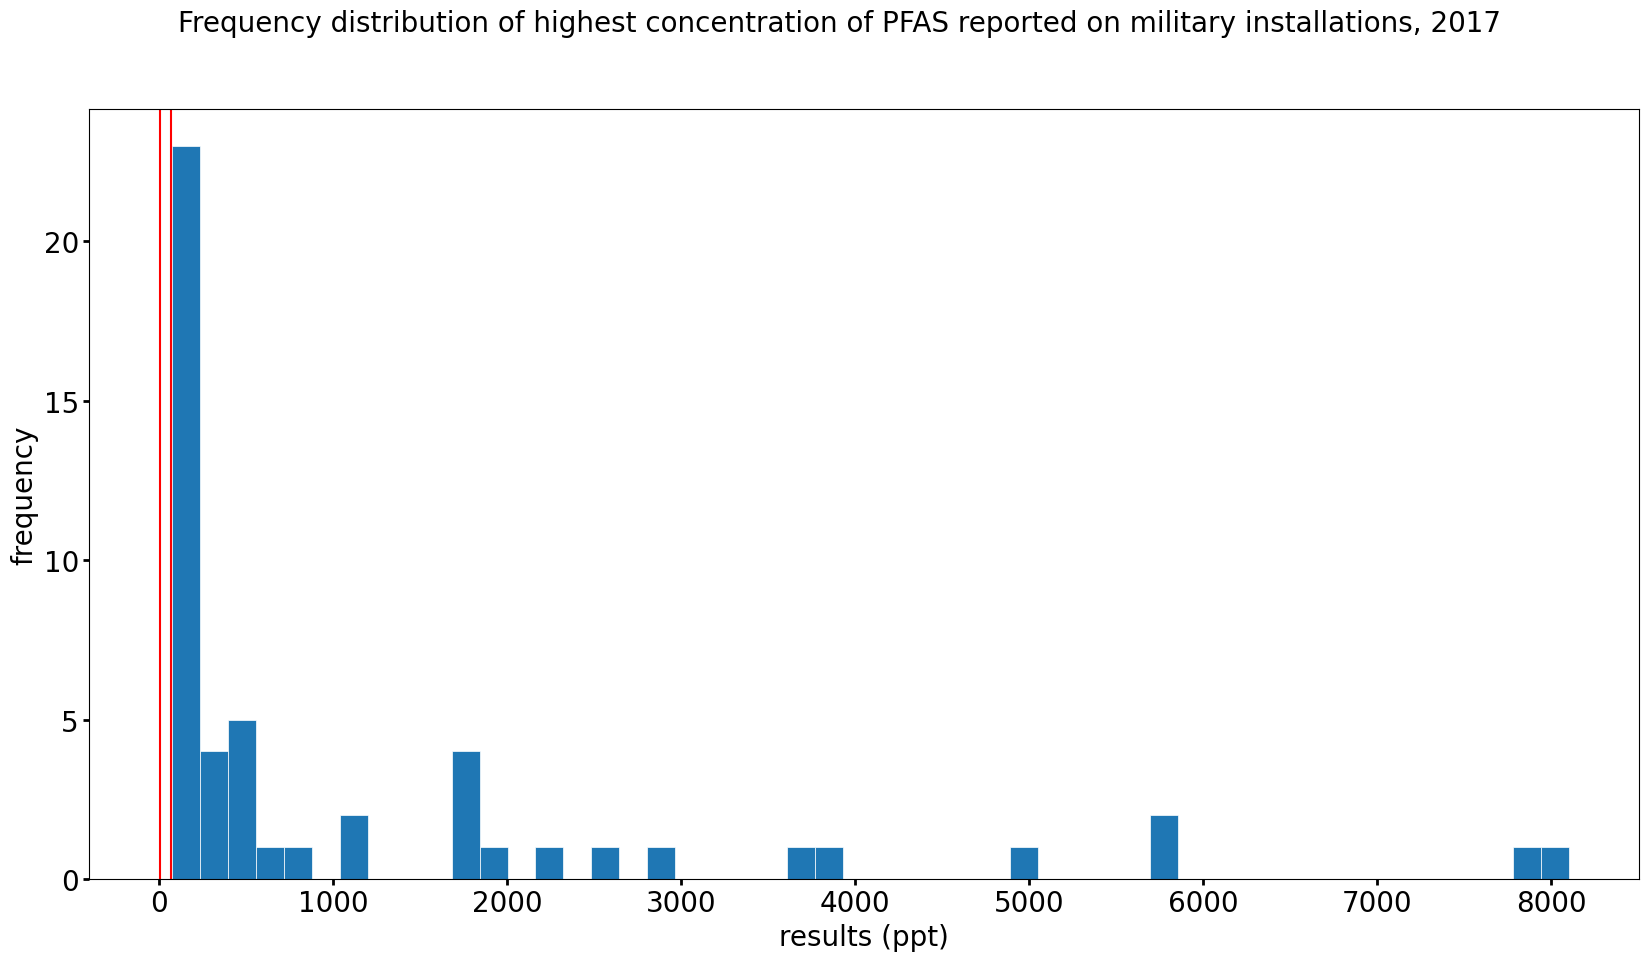

In [47]:
#create histogram of the frequency of PFAS concentrations for the 2017 dataset
fig, ax = plt.subplots(figsize=(20, 10))
plt.axvline(x=4, color = 'red') 
plt.axvline(x=70, color = 'red') 
plot_max_final_PFOS_PFOA = plt.hist(merged_df_sort['results'], bins=50, linewidth=0.5, edgecolor="white")
plt.suptitle('Frequency distribution of highest concentration of PFAS reported on military installations, 2017', fontsize=20)
plt.xlabel('results (ppt)', fontsize=20)
plt.ylabel('frequency', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20, width=2, length=4)
plot_max_final_PFOS_PFOA